<a href="https://colab.research.google.com/github/sohyunwriter/data-cookbook/blob/main/%EC%BD%94%ED%85%8C%EC%97%B0%EC%8A%B5_telco_customer_churn_(%EA%B3%B5%ED%86%B5)_EDA%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코테연습 1차

In [1]:
!pip install kaggle --upgrade --quiet

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import json
import sklearn
import re

#sklearn library
# 1.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# 2.preprocessing
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler

# 3.base setting
%matplotlib inline
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['savefig.dpi'] = 300
# font = {'weight':'normal',
#         'size':12}
# plt.rc('font', **font)
# sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
# sns.set_context('notebook')
# sns.set_style("ticks")
# FIG_FONT = dict(weight="bold", color="#7f7f7f")
# sns.set_palette('Spectral')

# 4.metrics
# from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_scoore, f1_score, roc_curve, classification_report, confusion_matrix
from sklearn import metrics

# 5.model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

## 1.Data 확인

### Load Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')

In [4]:
!kaggle datasets download -d blastchar/telco-customer-churn

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
telco-customer-churn.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
! unzip "telco-customer-churn.zip"

Archive:  telco-customer-churn.zip
replace WA_Fn-UseC_-Telco-Customer-Churn.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [304]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 데이터 구조 확인

In [7]:
df.shape
# 7043행 21열

(7043, 21)

In [8]:
# 데이터 구조 파악
# object 문자형
# int/float 숫자형
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# 문자형(범주형) 데이터 확인
df.describe(include=['object']).T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [10]:
# 숫자형 데이터 확인
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### 데이터 형태 변경
데이터 구조상 숫자형이지만 문자로 구성된 데이터를 변형

In [305]:
# 문자를 숫자형으로 변형 (errors -> 숫자로 바꿀수 없는 데이터를 NaN으로 강제 변경 후 숫자형태 변경)
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

타겟 0, 1로 변경

In [306]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [307]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == "Yes" else 0)

In [308]:
df['Churn'].unique()

array([0, 1])

In [309]:
df['cnt1'] = 1


## 2.데이터 EDA




### EDA 기본 내용
  1. (결측치) 각 피처(=컬럼)의 결측값 비율
  2. (이상치) 각 피처별 이상치 확인
  3. (unique) 각 피처의 unique값과 unique값별 빈도
  4. (기술통계) 각 피처의 기술통계 (평균값, 최대값, 최솟값, 최빈값, 분위수 등)
  5. (상관관계) 피처-피처, 피처-타겟 간 상관관계 매트릭스
  6. 히스토그램, bar graph, box plot 등 (인사이트 도출)
  7. 각 피처별 Information Value 등 확인

In [ ]:
## 코드 채워주세요

In [30]:
def create_bins(series, method='quantile', bins=10, labels=None):
    """
    연속형 컬럼 binning 함수

    Parameters:
        series : pd.Series (연속형 데이터)
        method : 'quantile' (분위수) or 'uniform' (균등)
        bins : 구간 수
        labels : 구간 이름 리스트 (default None -> 자동 생성)

    Returns:
        pd.Series : binning된 구간
    """
    if method == 'quantile':
        binned = pd.qcut(series, q=bins, labels=labels, duplicates='drop')
    elif method == 'uniform':
        binned = pd.cut(series, bins=bins, labels=labels)
    else:
        raise ValueError("method는 'quantile' 또는 'uniform'만 가능합니다.")

    return binned

In [57]:
temp = create_bins(df['TotalCharges'])

In [60]:
temp.unique()[0].left

np.float64(18.799)

In [64]:
temp.apply(lambda x: x.left)

,TotalCharges
0,18.799
1,1397.475
2,84.600
3,1397.475
4,84.600
...,...
7038,1397.475
7039,5976.640
7040,267.070
7041,267.070


In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def eda_target(data, col, target_col='Churn', bins=10, method='quantile', is_category=None):
    """
    연속형/명목형 컬럼의 EDA + Target Rate 시각화

    - 연속형: binning 후 구성비(%)와 Target Rate 겹쳐서 표시
    - 명목형: 그룹별 Count(%)와 Target Rate 겹쳐서 표시

    Parameters:
        df : pd.DataFrame
        col : 분석할 컬럼
        target_col : Target 컬럼 (0/1)
        bins : 연속형일 때 bin 수
        method : 'quantile' 또는 'uniform'
    """

    df = data[[col, target_col]].copy()

    # Bin 생성
    if is_category != True and pd.api.types.is_numeric_dtype(df[col]):
        # 연속형 처리: binning
        df[f'{col}_bin'] = create_bins(df[col], method=method, bins=bins)
        df[f'{col}_bin'] = df[f'{col}_bin'].apply(lambda x: x.left)
        group_col = f'{col}_bin'
    else:
        # 명목형 처리: 그대로 그룹
        group_col = col

    # 2) 구간별 Count & Target Rate 계산
    summary = df.groupby(group_col).agg(
        Count=(col, 'count'),
        TargetRate=(target_col, 'mean')
    ).reset_index()

    summary['CountPercent'] = summary['Count'] / summary['Count'].sum() * 100
    summary['TargetRatePercent'] = summary['TargetRate'] * 100

    print(summary)

    # 3) 그래프 그리기
    # x축
    # x_labels = [interval.left for interval in summary[f'{col}_bin']]
    x_labels = summary[group_col].astype(str).unique().tolist()
    x = range(len(summary))

    # figure 크기
    plt.figure(figsize=(10,5))

    # Count (막대)
    # plt.bar(x, summary['Count'], color='skyblue', alpha=0.6, label='Count')
    plt.bar(x, summary['CountPercent'], color='skyblue', alpha=0.6, label='Composition (%)')
    plt.ylabel('Composition (%)')

    # Target Rate (라인)
    ax2 = plt.twinx()
    ax2.plot(x, summary['TargetRatePercent'], color='red', marker='o', linestyle='-', label='Target Rate (%)')
    ax2.set_ylim(0,100)
    ax2.set_ylabel('Target Rate (%)')

    # x축 구간 라벨
    plt.xticks(x, x_labels)
    plt.title(f'Target EDA ({col})')
    plt.show()


#### gender에 따른 Churn -> gender간 이탈률 차이 없음

In [81]:
df.groupby('gender')[['cnt1', 'Churn']].sum()

,cnt1,Churn
gender,,
Female,3488,939
Male,3555,930


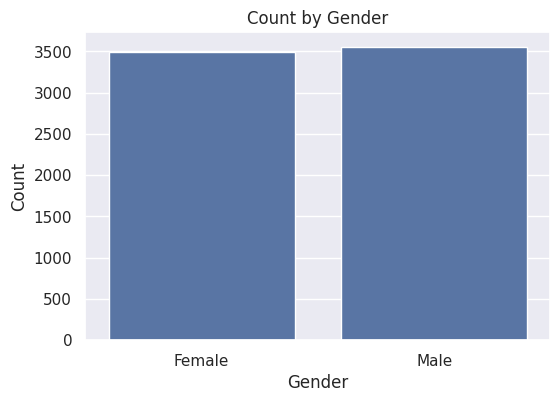

In [82]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender')  # 단순 갯수
plt.title('Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

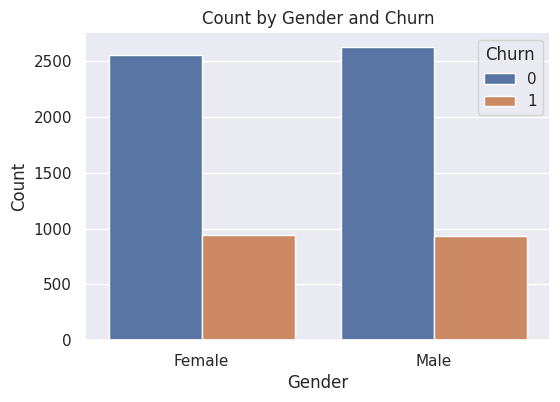

In [83]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Count by Gender and Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

   gender  Count  TargetRate  CountPercent  TargetRatePercent
0  Female   3488    0.269209      49.52435          26.920872
1    Male   3555    0.261603      50.47565          26.160338


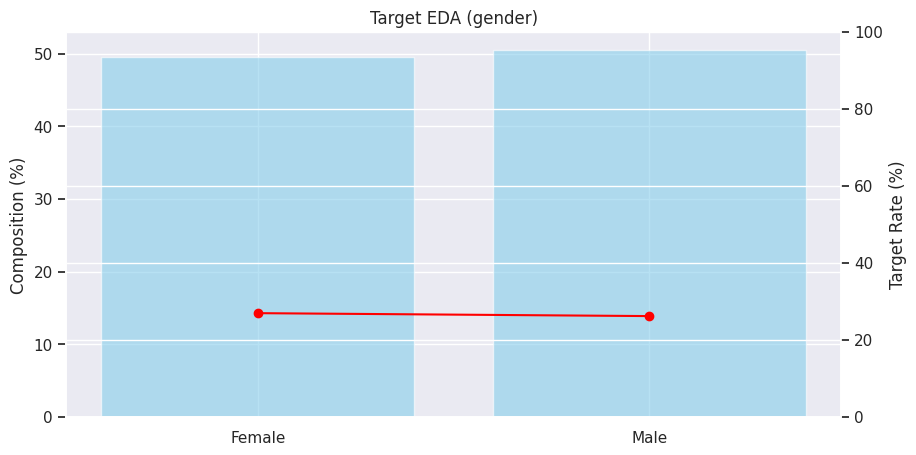

In [160]:
eda_target(df, 'gender', target_col='Churn', bins=10)

In [115]:
def eda_count_categorical(df, col):
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x=col)  # 단순 갯수
  plt.title(f'Count by {col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  plt.show()

In [114]:
def eda_count_categorical_target(df, col, target_col):
  plt.figure(figsize=(6,4))
  sns.countplot(data=df, x=col, hue=target_col)
  plt.title(f'Count by {col} and {target_col}')
  plt.xlabel(f'{col}')
  plt.ylabel('Count')
  plt.show()

#### Partner에 따른 Churn -> Partner 없는 사람이 이탈률 32%로 높음

In [110]:
df.groupby('Partner')[['cnt1', 'Churn']].sum()

,cnt1,Churn
Partner,,
No,3641,1200
Yes,3402,669


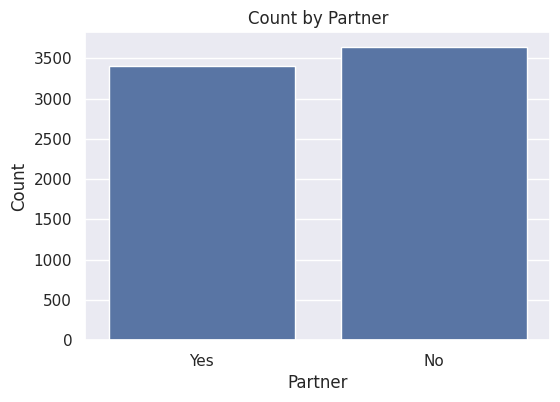

In [116]:
eda_count_categorical(df, 'Partner')

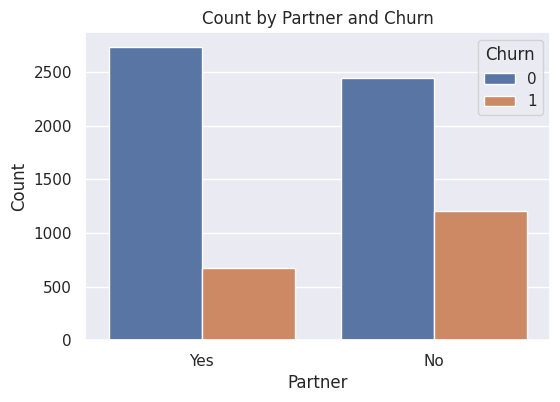

In [117]:
eda_count_categorical_target(df, 'Partner', 'Churn')

  Partner  Count  TargetRate  CountPercent  TargetRatePercent
0      No   3641    0.329580      51.69672          32.957979
1     Yes   3402    0.196649      48.30328          19.664903


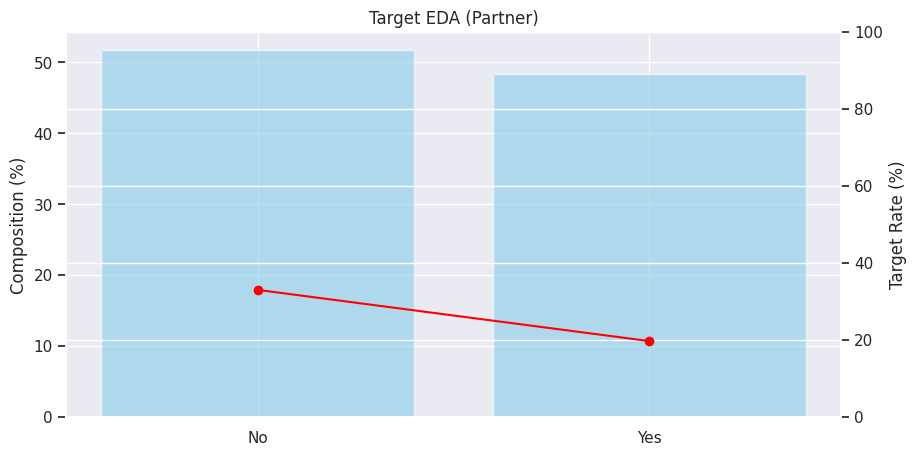

In [159]:
eda_target(df, 'Partner', target_col='Churn', bins=10)

#### Dependents에 따른 Churn -> 자손 없는 사람이 70%, 자손 없는 사람의 이탈률 31.3% 수준으로 자손 있는 사람보다 2배 가량 높음

In [140]:
df.groupby('Dependents')[['cnt1', 'Churn']].sum()

,cnt1,Churn
Dependents,,
No,4933,1543
Yes,2110,326


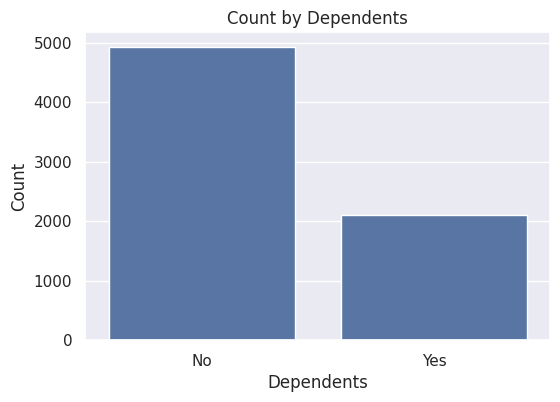

In [142]:
eda_count_categorical(df, 'Dependents')

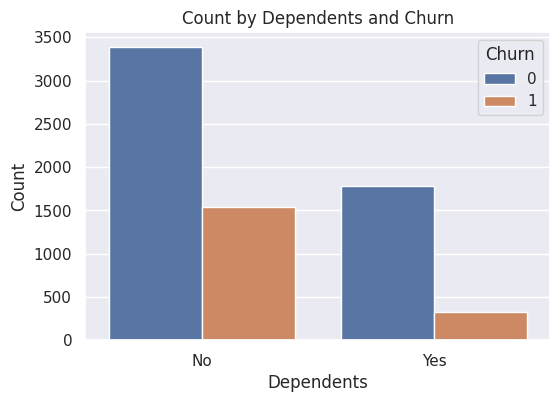

In [141]:
eda_count_categorical_target(df, 'Dependents', 'Churn')

  Dependents  Count  TargetRate  CountPercent  TargetRatePercent
0         No   4933    0.312791     70.041176          31.279140
1        Yes   2110    0.154502     29.958824          15.450237


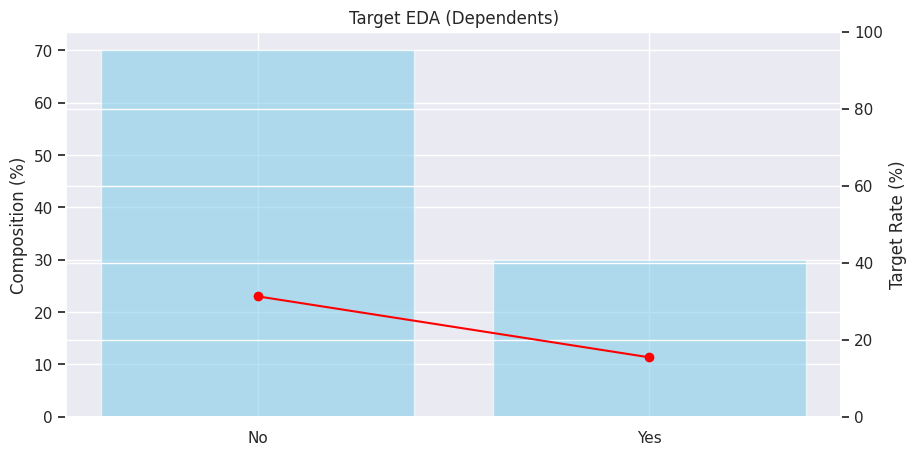

In [158]:
eda_target(df, 'Dependents', target_col='Churn', bins=10)

#### SeniorCitizen에 따른 Churn -> 시니어는 전체의 23.6%, 시니어 이탈률 41.7%로 높음

In [155]:
df.groupby('SeniorCitizen')[['cnt1', 'Churn']].sum()

,cnt1,Churn
SeniorCitizen,,
0,5901,1393
1,1142,476


In [148]:
df['SeniorCitizen'].unique()

array([0, 1])

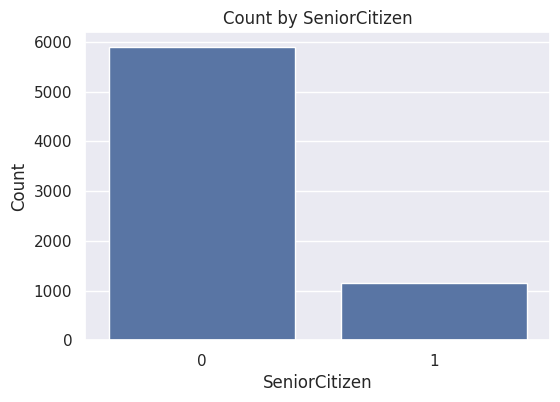

In [151]:
eda_count_categorical(df, 'SeniorCitizen')

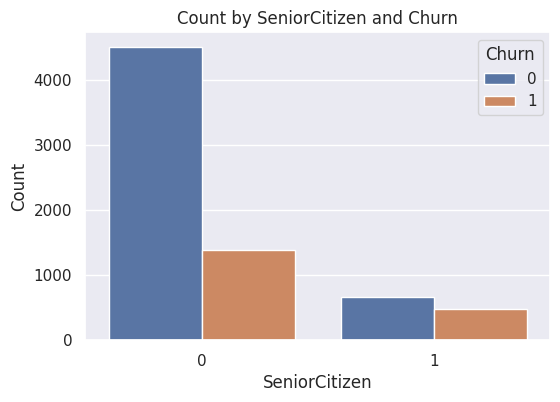

In [149]:
eda_count_categorical_target(df, 'SeniorCitizen', 'Churn')

   SeniorCitizen  Count  TargetRate  CountPercent  TargetRatePercent
0              0   5901    0.236062     83.785319          23.606168
1              1   1142    0.416813     16.214681          41.681261


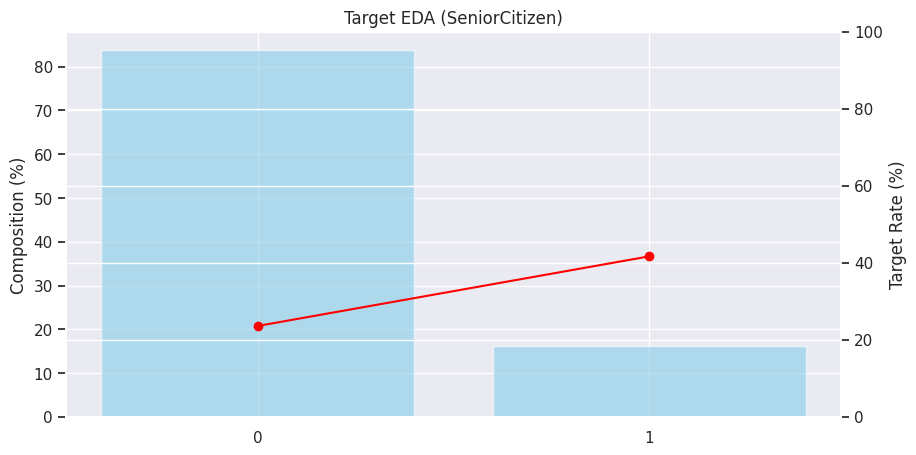

In [157]:
eda_target(df, 'SeniorCitizen', target_col='Churn', bins=10, is_category=True)

#### PhoneService에 따른 Churn -> PhoneService 가입자 비중이 전체 중 90% 차지, PhoneService 가입유무에 따른 이탈률 차이 없음

In [162]:
df.groupby('PhoneService')[['cnt1', 'Churn']].sum()

,cnt1,Churn
PhoneService,,
No,682,170
Yes,6361,1699


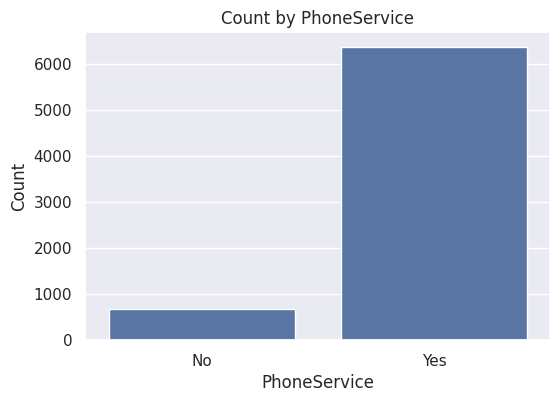

In [163]:
eda_count_categorical(df, 'PhoneService')

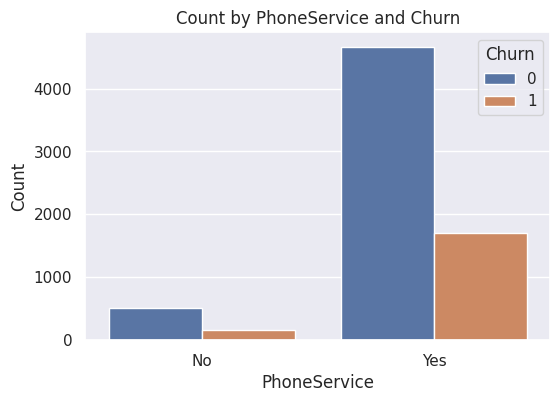

In [164]:
eda_count_categorical_target(df, 'PhoneService', 'Churn')

  PhoneService  Count  TargetRate  CountPercent  TargetRatePercent
0           No    682    0.249267      9.683374          24.926686
1          Yes   6361    0.267096     90.316626          26.709637


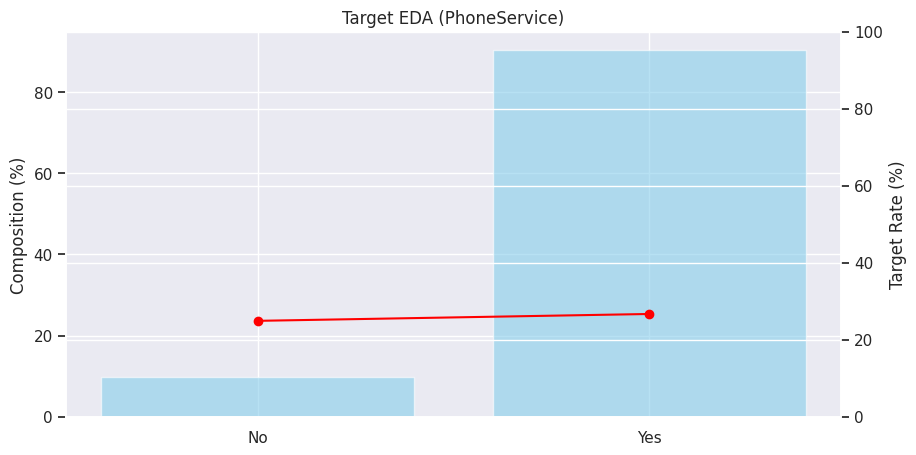

In [165]:
eda_target(df, 'PhoneService', target_col='Churn', bins=10)

#### MultipleLines에 따른 Churn -> 다중회선 가입자가 단일회선 가입자 대비 이탈률 28.6%로 다소 높음 (단일회선 가입자 이탈률: 25% 수준)

In [166]:
df.groupby('MultipleLines')[['cnt1', 'Churn']].sum()

,cnt1,Churn
MultipleLines,,
No,3390,849
No phone service,682,170
Yes,2971,850


      MultipleLines  Count  TargetRate  CountPercent  TargetRatePercent
0                No   3390    0.250442     48.132898          25.044248
1  No phone service    682    0.249267      9.683374          24.926686
2               Yes   2971    0.286099     42.183729          28.609896


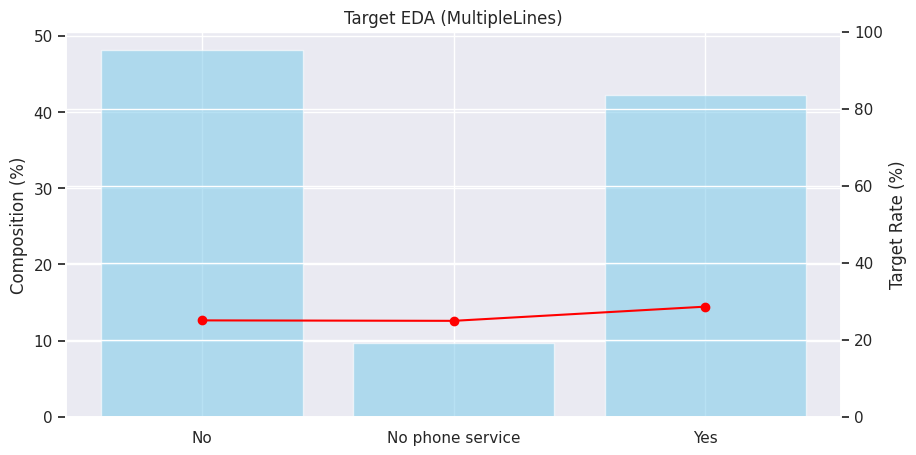

In [169]:
eda_target(df, 'MultipleLines', target_col='Churn', bins=10)

#### InternetService에 따른 Churn -> InternetService가 'Fiber optic'인 사람의 이탈률이 41.7% 수준으로 매우 높음

In [170]:
df.groupby('InternetService')[['cnt1', 'Churn']].sum()

,cnt1,Churn
InternetService,,
DSL,2421,459
Fiber optic,3096,1297
No,1526,113


  InternetService  Count  TargetRate  CountPercent  TargetRatePercent
0             DSL   2421    0.189591     34.374556          18.959108
1     Fiber optic   3096    0.418928     43.958540          41.892765
2              No   1526    0.074050     21.666903           7.404980


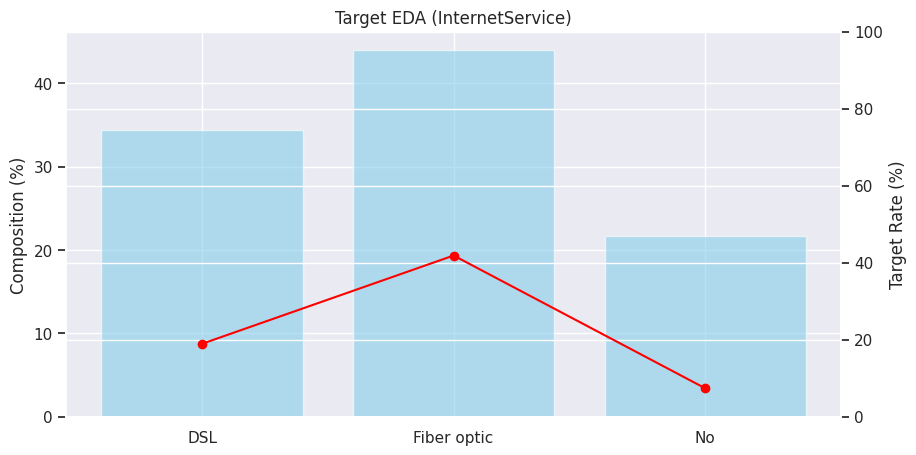

In [171]:
eda_target(df, 'InternetService', target_col='Churn', bins=10)

#### OnlineSecurity에 따른 Churn -> OnlineSecurity이 'No'인 사람의 이탈률이 41.8% 수준으로 매우 높음

In [172]:
df.groupby('OnlineSecurity')[['cnt1', 'Churn']].sum()

,cnt1,Churn
OnlineSecurity,,
No,3498,1461
No internet service,1526,113
Yes,2019,295


        OnlineSecurity  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   3498    0.417667     49.666335          41.766724
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2019    0.146112     28.666761          14.611194


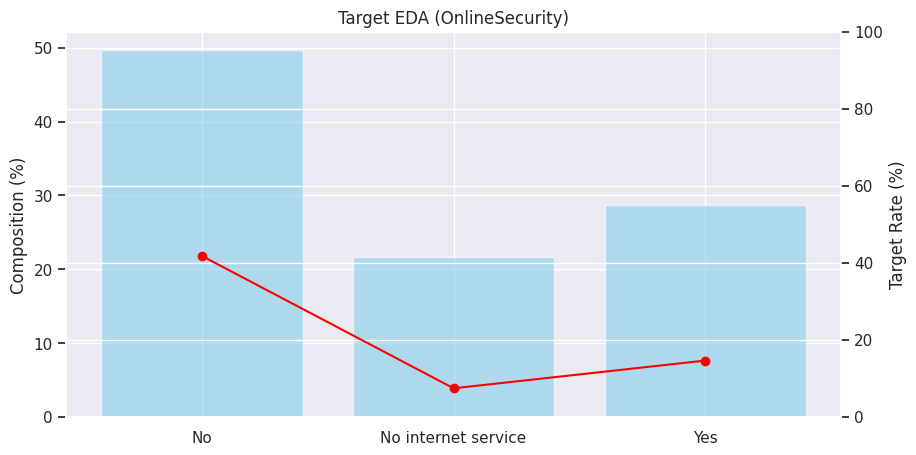

In [173]:
eda_target(df, 'OnlineSecurity', target_col='Churn', bins=10)

#### OnlineBackup에 따른 Churn -> OnlineBackup이 'No'인 사람의 이탈률이 39.9% 수준으로 매우 높음

In [174]:
df.groupby('OnlineBackup')[['cnt1', 'Churn']].sum()

,cnt1,Churn
OnlineBackup,,
No,3088,1233
No internet service,1526,113
Yes,2429,523


          OnlineBackup  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   3088    0.399288     43.844952          39.928756
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2429    0.215315     34.488144          21.531494


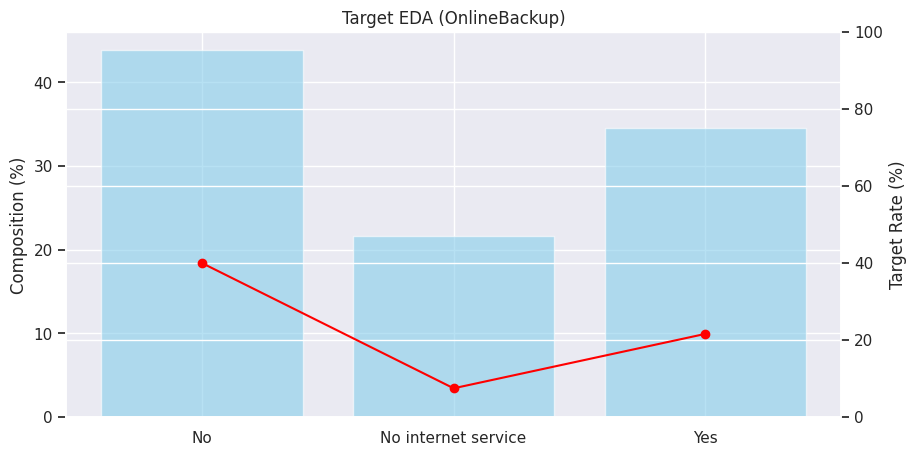

In [178]:
eda_target(df, 'OnlineBackup', target_col='Churn', bins=10)

#### DeviceProtection에 따른 Churn -> DeviceProtection이 'No'인 사람의 이탈률이 39.1% 수준으로 매우 높음

In [179]:
df.groupby('DeviceProtection')[['cnt1', 'Churn']].sum()

,cnt1,Churn
DeviceProtection,,
No,3095,1211
No internet service,1526,113
Yes,2422,545


      DeviceProtection  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   3095    0.391276     43.944342          39.127625
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2422    0.225021     34.388755          22.502064


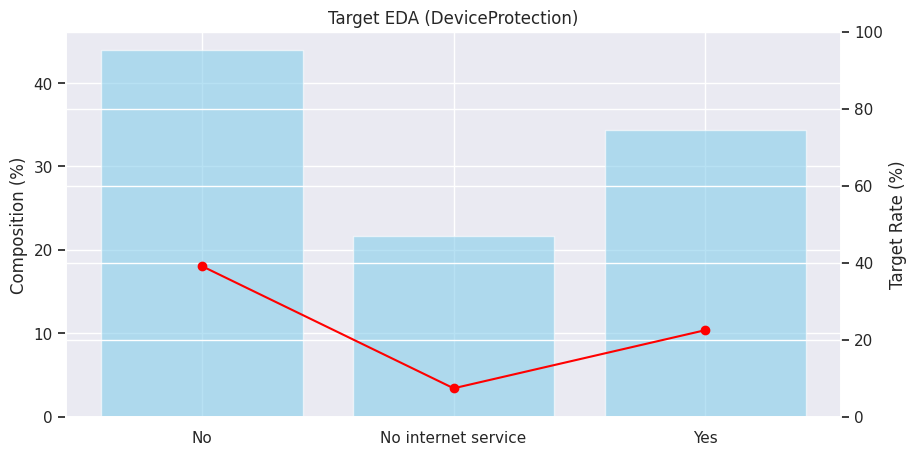

In [180]:
eda_target(df, 'DeviceProtection', target_col='Churn', bins=10)

#### TechSupport에 따른 Churn -> TechSupport가 'No'인 사람의 이탈률이 41.6% 수준으로 매우 높음

In [181]:
df.groupby('TechSupport')[['cnt1', 'Churn']].sum()

,cnt1,Churn
TechSupport,,
No,3473,1446
No internet service,1526,113
Yes,2044,310


           TechSupport  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   3473    0.416355     49.311373          41.635474
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2044    0.151663     29.021724          15.166341


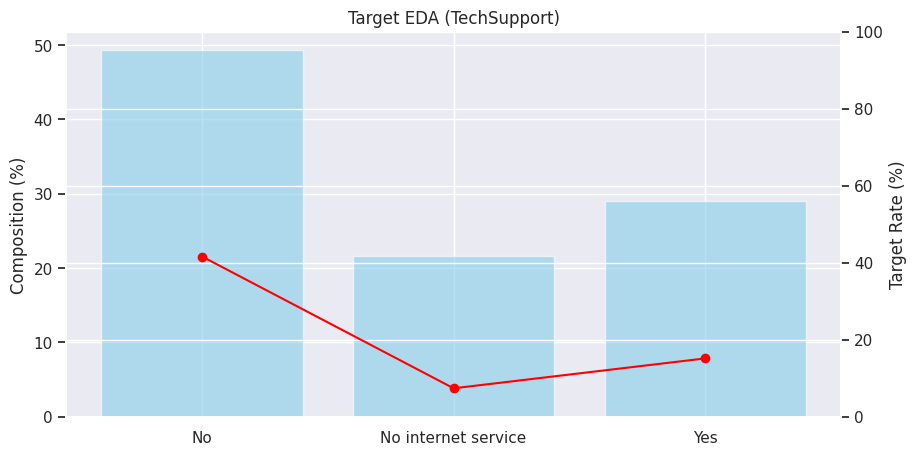

In [182]:
eda_target(df, 'TechSupport', target_col='Churn', bins=10)

#### StreamingTV에 따른 Churn -> StreamingTV가 'No'인 사람의 이탈률이 33.5% 수준으로 'Yes'인 사람 대비 3%p 정도 높음

In [183]:
df.groupby('StreamingTV')[['cnt1', 'Churn']].sum()

,cnt1,Churn
StreamingTV,,
No,2810,942
No internet service,1526,113
Yes,2707,814


           StreamingTV  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   2810    0.335231     39.897771          33.523132
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2707    0.300702     38.435326          30.070188


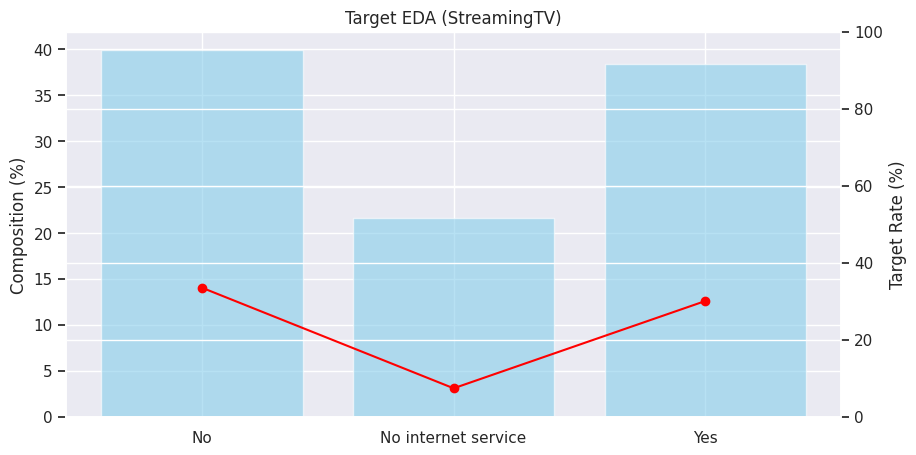

In [184]:
eda_target(df, 'StreamingTV', target_col='Churn', bins=10)

#### StreamingMovies에 따른 Churn -> StreamingMovies가 'No'인 사람의 이탈률이 33.7% 수준으로 'Yes'인 사람 대비 3%p 정도 높음

In [185]:
df.groupby('StreamingMovies')[['cnt1', 'Churn']].sum()

,cnt1,Churn
StreamingMovies,,
No,2785,938
No internet service,1526,113
Yes,2732,818


       StreamingMovies  Count  TargetRate  CountPercent  TargetRatePercent
0                   No   2785    0.336804     39.542808          33.680431
1  No internet service   1526    0.074050     21.666903           7.404980
2                  Yes   2732    0.299414     38.790288          29.941435


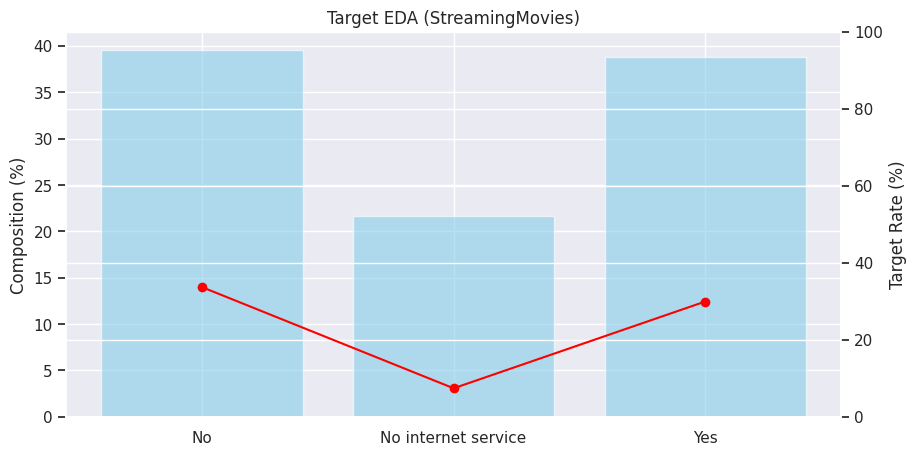

In [186]:
eda_target(df, 'StreamingMovies', target_col='Churn', bins=10)

#### Contract에 따른 Churn -> Contract가 'Month-to-month'인 사람의 이탈률이 42.7% 수준으로 'One year', 'Two year' 보다 매우 높음

In [187]:
df.groupby('Contract')[['cnt1', 'Churn']].sum()

,cnt1,Churn
Contract,,
Month-to-month,3875,1655
One year,1473,166
Two year,1695,48


         Contract  Count  TargetRate  CountPercent  TargetRatePercent
0  Month-to-month   3875    0.427097     55.019168          42.709677
1        One year   1473    0.112695     20.914383          11.269518
2        Two year   1695    0.028319     24.066449           2.831858


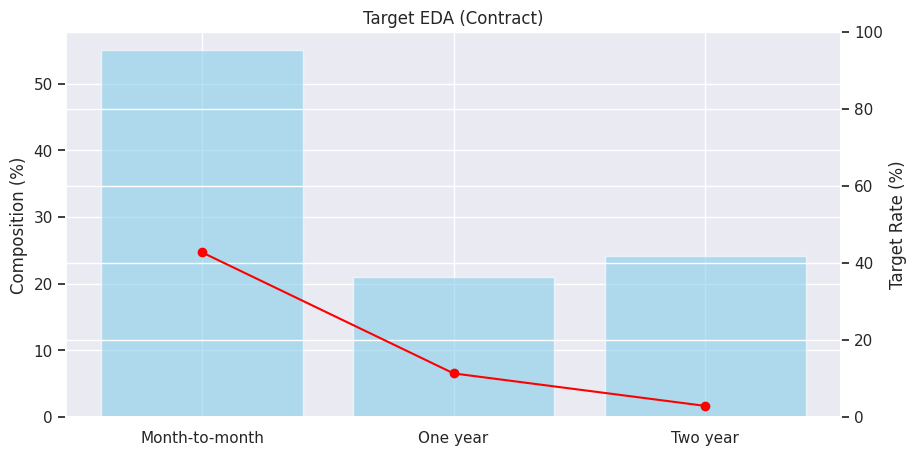

In [188]:
eda_target(df, 'Contract', target_col='Churn', bins=10)

#### PaperlessBilling에 따른 Churn -> PaperlessBilling가 'Yes'인 사람의 이탈률이 33.6% 수준으로 'No'인 사람 대비 2배 정도 높음

In [189]:
df.groupby('PaperlessBilling')[['cnt1', 'Churn']].sum()

,cnt1,Churn
PaperlessBilling,,
No,2872,469
Yes,4171,1400


  PaperlessBilling  Count  TargetRate  CountPercent  TargetRatePercent
0               No   2872    0.163301     40.778078          16.330084
1              Yes   4171    0.335651     59.221922          33.565092


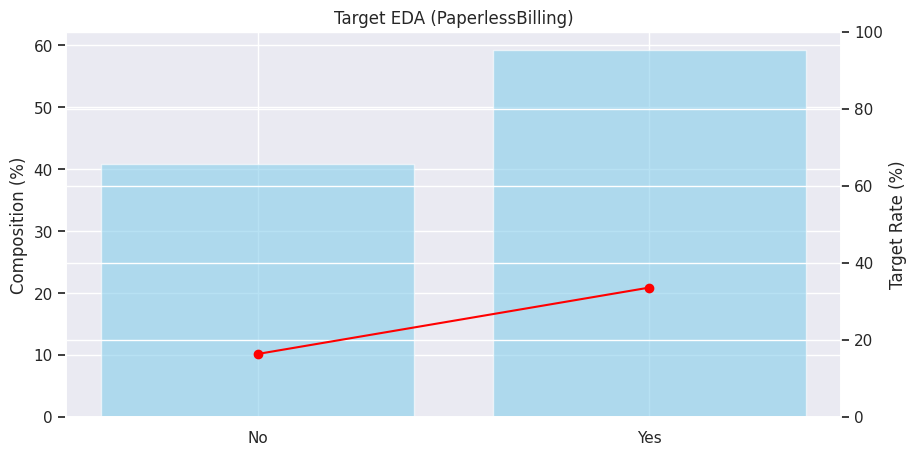

In [190]:
eda_target(df, 'PaperlessBilling', target_col='Churn', bins=10)

#### PaymentMethod에 따른 Churn -> PaymentMethod가 'Electronic check'인 사람의 이탈률이 33.6% 수준으로 높음

In [191]:
df.groupby('PaymentMethod')[['cnt1', 'Churn']].sum()

,cnt1,Churn
PaymentMethod,,
Bank transfer (automatic),1544,258
Credit card (automatic),1522,232
Electronic check,2365,1071
Mailed check,1612,308


               PaymentMethod  Count  TargetRate  CountPercent  \
0  Bank transfer (automatic)   1544    0.167098     21.922476   
1    Credit card (automatic)   1522    0.152431     21.610109   
2           Electronic check   2365    0.452854     33.579441   
3               Mailed check   1612    0.191067     22.887974   

   TargetRatePercent  
0          16.709845  
1          15.243101  
2          45.285412  
3          19.106700  


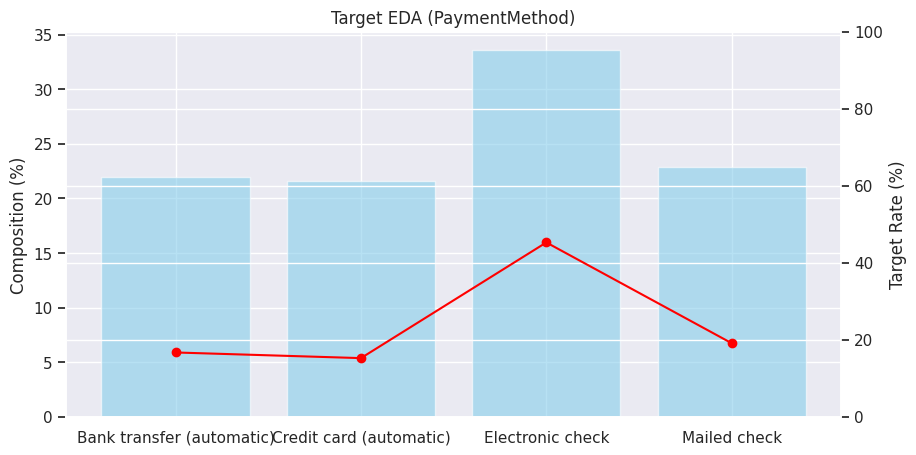

In [192]:
eda_target(df, 'PaymentMethod', target_col='Churn', bins=10)

#### tenure에 따른 Churn -> tenure가 14 이하인 사람의 이탈률이 30% 이상

In [205]:
len(df['tenure'].unique())

73

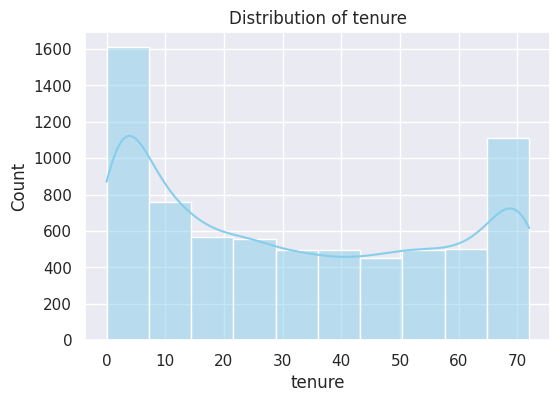

In [206]:
plt.figure(figsize=(6,4))
sns.histplot(df['tenure'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of tenure')
plt.xlabel('tenure')
plt.ylabel('Count')
plt.show()

  tenure_bin  Count  TargetRate  CountPercent  TargetRatePercent
0     -0.072   1612    0.517990     22.887974          51.799007
1      7.200    759    0.347826     10.776658          34.782609
2     14.400    570    0.296491      8.093142          29.649123
3     21.600    556    0.226619      7.894363          22.661871
4     28.800    545    0.214679      7.738180          21.467890
5     36.000    444    0.220721      6.304132          22.072072
6     43.200    452    0.159292      6.417720          15.929204
7     50.400    495    0.141414      7.028255          14.141414
8     57.600    501    0.091816      7.113446           9.181637
9     64.800   1109    0.064923     15.746131           6.492335


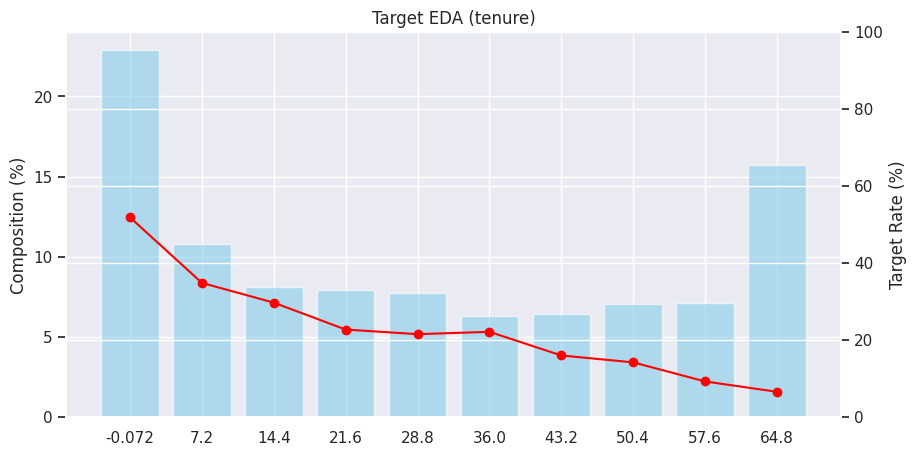

In [207]:
eda_target(df, 'tenure', target_col='Churn', method='uniform', bins=10)

  tenure_bin  Count  TargetRate  CountPercent  TargetRatePercent
0     -0.001    862    0.583527     12.239103          58.352668
1      2.000    619    0.453958      8.788868          45.395800
2      6.000    705    0.358865     10.009939          35.886525
3     12.000    692    0.309249      9.825359          30.924855
4     20.000    691    0.228654      9.811160          22.865412
5     29.000    717    0.218968     10.180321          21.896792
6     40.000    652    0.176380      9.257419          17.638037
7     50.000    698    0.136103      9.910549          13.610315
8     60.000    756    0.092593     10.734062           9.259259
9     69.000    651    0.035330      9.243220           3.533026


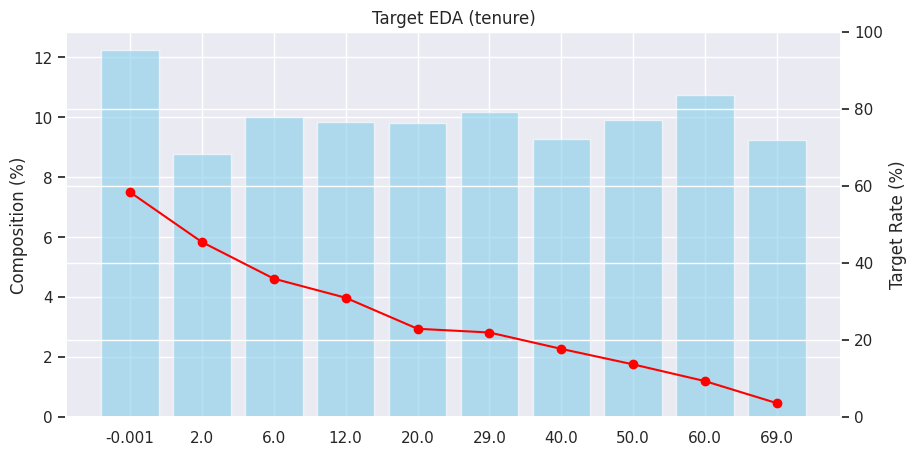

In [208]:
eda_target(df, 'tenure', target_col='Churn', bins=10)

#### MonthlyCharges에 따른 Churn -> 월 청구액 70 ~ 100달러 구간에서 이탈률 36 ~ 39% 수준으로 매우 높음

In [195]:
len(df['MonthlyCharges'].unique())

1585

In [196]:
# df.groupby('MonthlyCharges')[['cnt1', 'Churn']].sum()

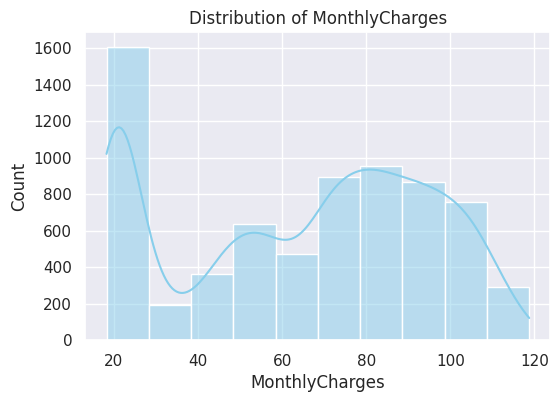

In [198]:
plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Count')
plt.show()

  MonthlyCharges_bin  Count  TargetRate  CountPercent  TargetRatePercent
0              18.15   1606    0.092154     22.802783           9.215442
1              28.30    191    0.298429      2.711913          29.842932
2              38.35    365    0.326027      5.182451          32.602740
3              48.40    640    0.237500      9.087037          23.750000
4              58.45    474    0.113924      6.730087          11.392405
5              68.50    893    0.390817     12.679256          39.081747
6              78.55    953    0.372508     13.531166          37.250787
7              88.60    873    0.366552     12.395286          36.655212
8              98.65    754    0.360743     10.705665          36.074271
9             108.70    294    0.146259      4.174358          14.625850


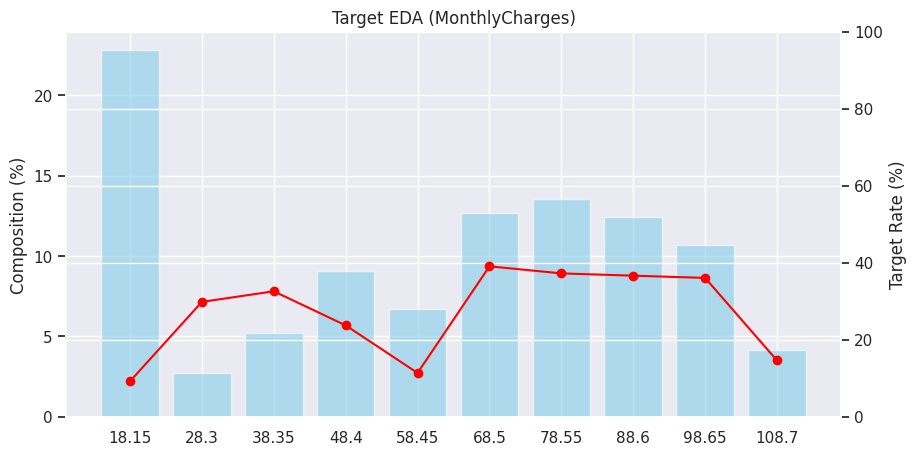

In [199]:
eda_target(df, 'MonthlyCharges', target_col='Churn', method='uniform', bins=10)

  MonthlyCharges_bin  Count  TargetRate  CountPercent  TargetRatePercent
0             18.249    717    0.085077     10.180321           8.507671
1             20.050    703    0.098151      9.981542           9.815078
2             25.050    695    0.254676      9.867954          25.467626
3             45.850    702    0.245014      9.967343          24.501425
4             58.830    711    0.215190     10.095130          21.518987
5             70.350    700    0.381429      9.938946          38.142857
6             79.100    705    0.378723     10.009939          37.872340
7             85.500    702    0.343305      9.967343          34.330484
8             94.250    704    0.409091      9.995740          40.909091
9            102.600    704    0.247159      9.995740          24.715909


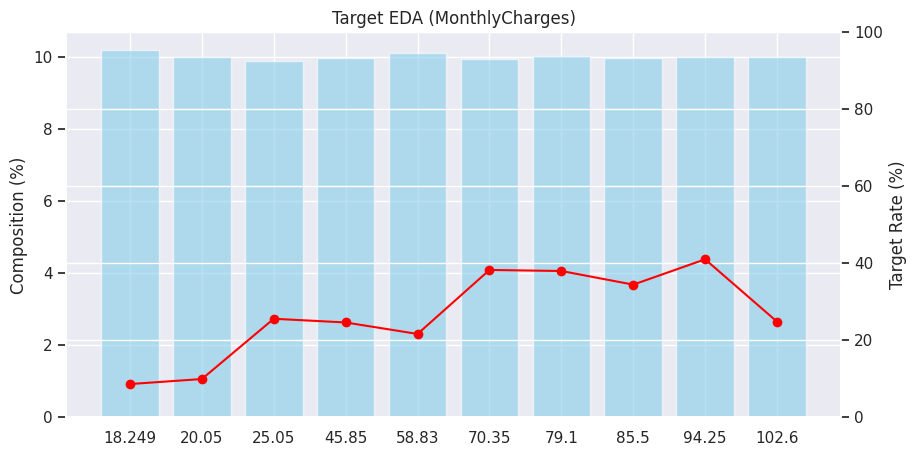

In [197]:
eda_target(df, 'MonthlyCharges', target_col='Churn', bins=10)

#### TotalCharges에 따른 Churn -> 총 청구액 10 ~ 885달러 구간에서 이탈률 37% 수준으로 매우 높음

In [200]:
len(df['TotalCharges'].unique())

6531

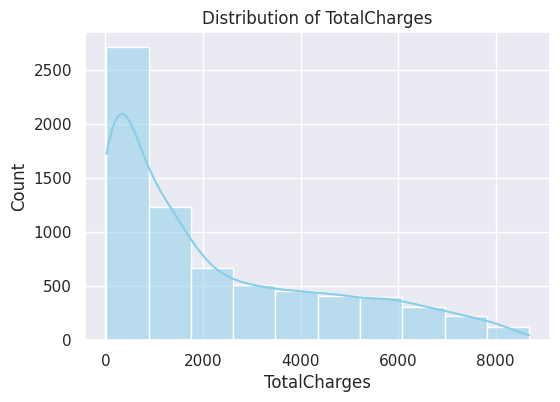

In [201]:
plt.figure(figsize=(6,4))
sns.histplot(df['TotalCharges'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Count')
plt.show()

  TotalCharges_bin  Count  TargetRate  CountPercent  TargetRatePercent
0           10.134   2709    0.377999     38.523891          37.799926
1          885.400   1228    0.220684     17.463026          22.068404
2         1752.000    671    0.247392      9.542093          24.739195
3         2618.600    508    0.246063      7.224118          24.606299
4         3485.200    454    0.160793      6.456200          16.079295
5         4351.800    412    0.167476      5.858931          16.747573
6         5218.400    395    0.146835      5.617179          14.683544
7         6085.000    310    0.148387      4.408419          14.838710
8         6951.600    223    0.143498      3.171217          14.349776
9         7818.200    122    0.040984      1.734926           4.098361


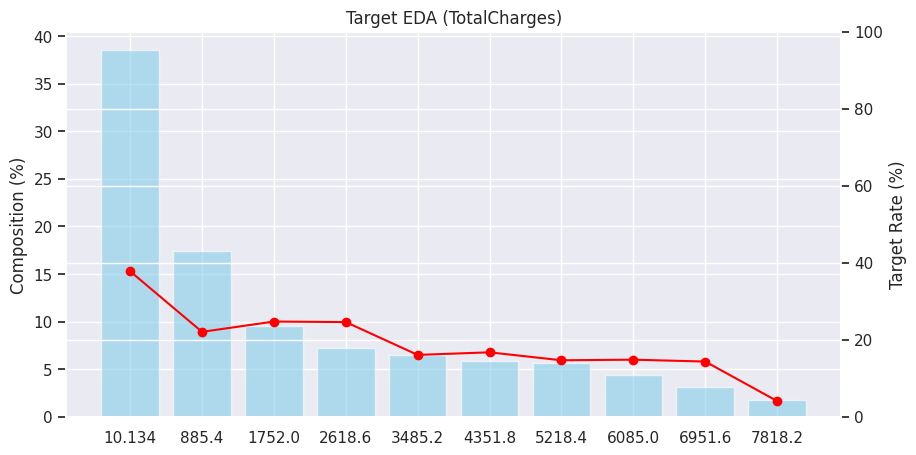

In [202]:
eda_target(df, 'TotalCharges', target_col='Churn', method='uniform', bins=10)

#### (참고) 전체 컬럼에 대해 EDA

In [209]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'TotalCharges_bin', 'cnt1'],
      dtype='object')

In [145]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

0 gender
        cnt1  Churn
gender             
Female  3488    939
Male    3555    930


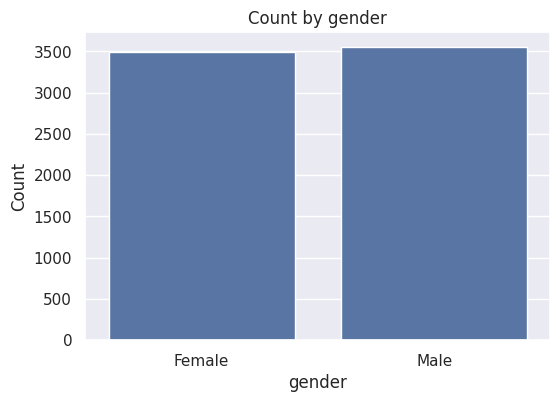

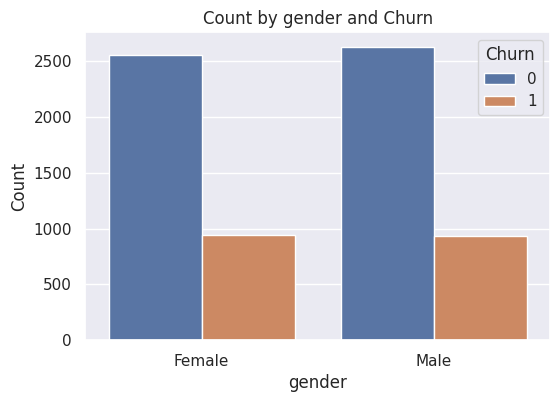

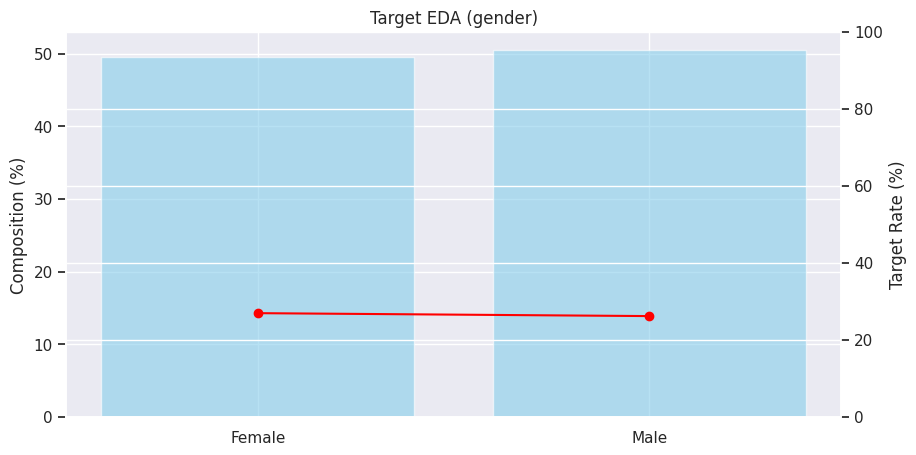

1 SeniorCitizen
               cnt1  Churn
SeniorCitizen             
0              5901   1393
1              1142    476


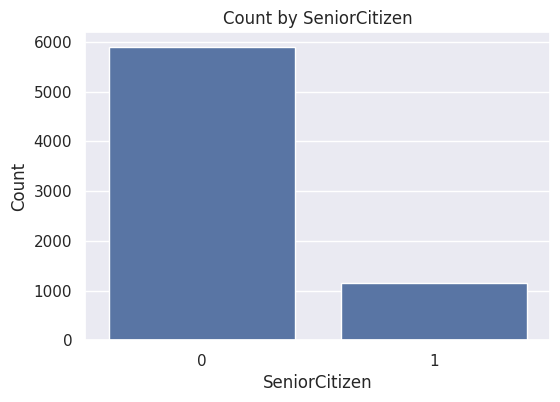

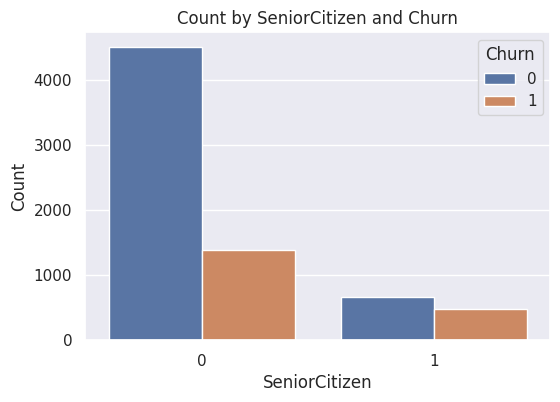

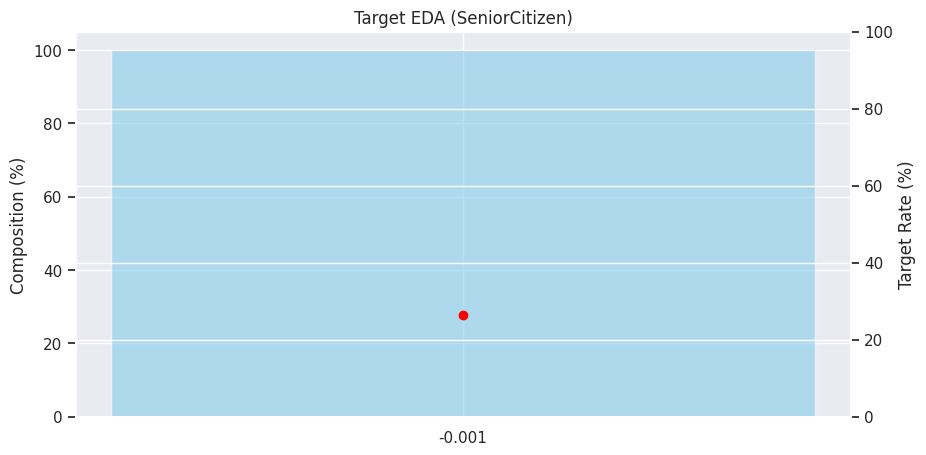

2 Partner
         cnt1  Churn
Partner             
No       3641   1200
Yes      3402    669


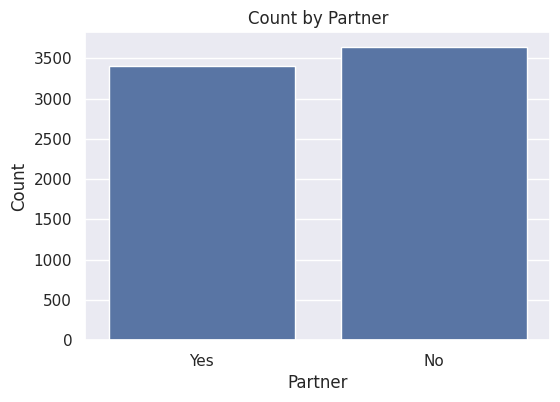

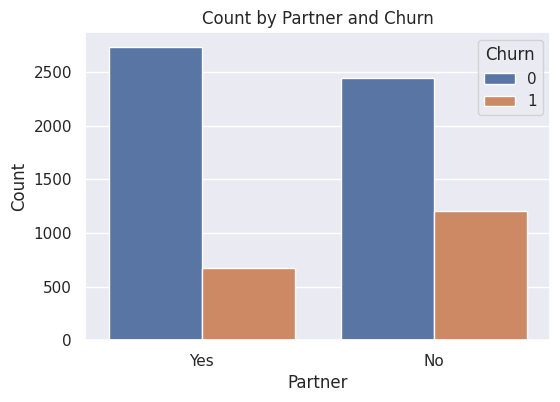

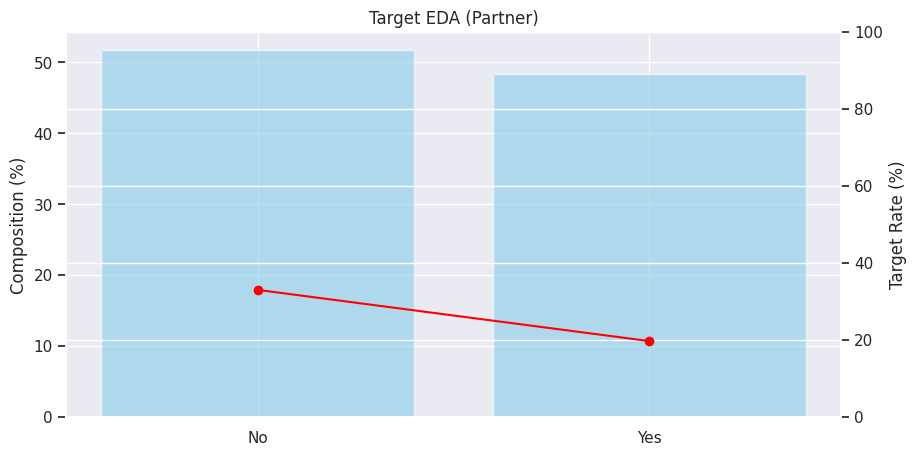

3 Dependents
            cnt1  Churn
Dependents             
No          4933   1543
Yes         2110    326


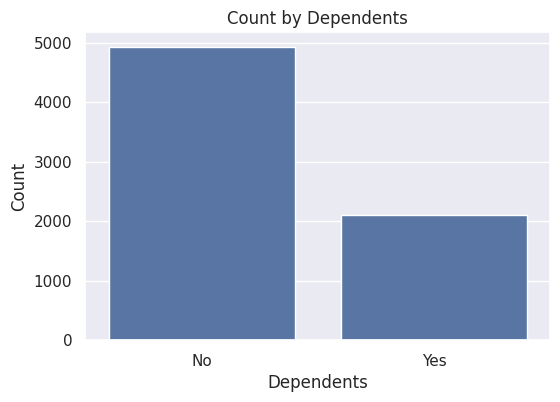

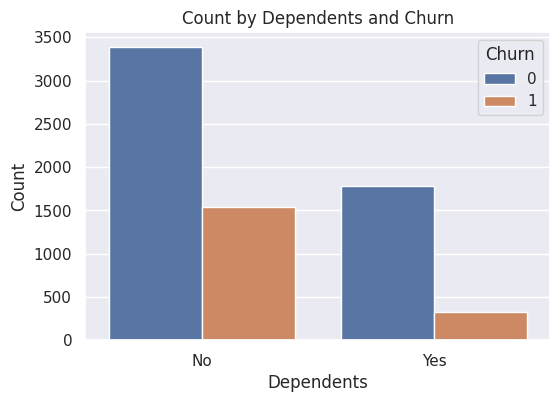

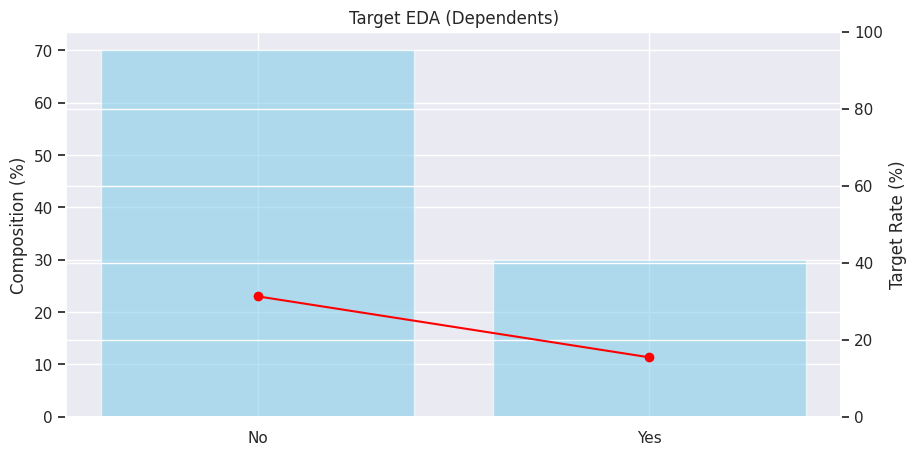

4 tenure
        cnt1  Churn
tenure             
0         11      0
1        613    380
2        238    123
3        200     94
4        176     83
...      ...    ...
68       100      9
69        95      8
70       119     11
71       170      6
72       362      6

[73 rows x 2 columns]


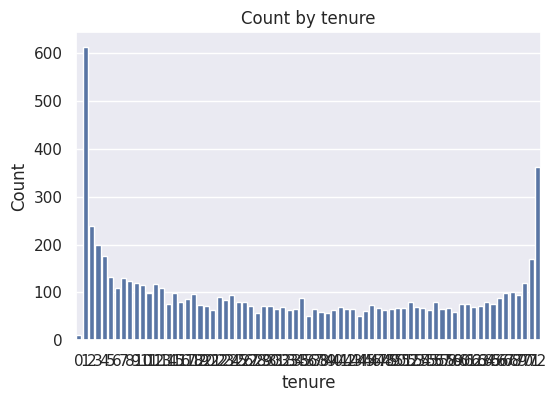

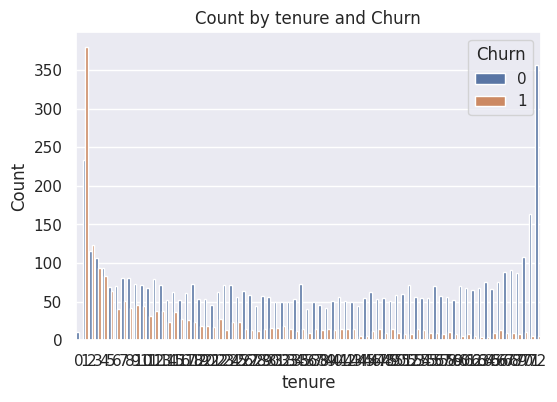

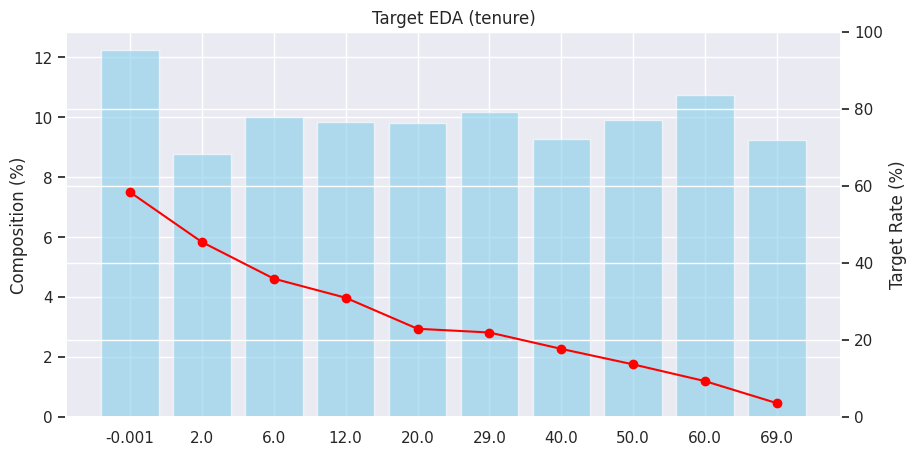

5 PhoneService
              cnt1  Churn
PhoneService             
No             682    170
Yes           6361   1699


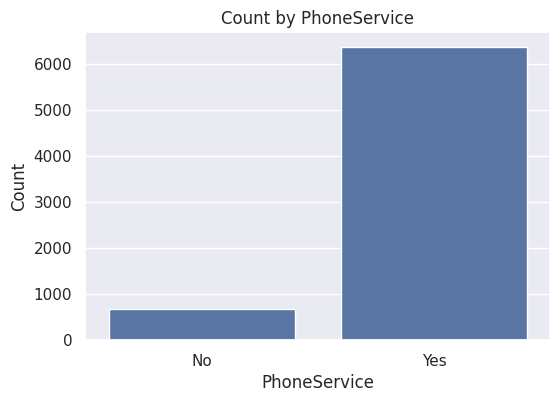

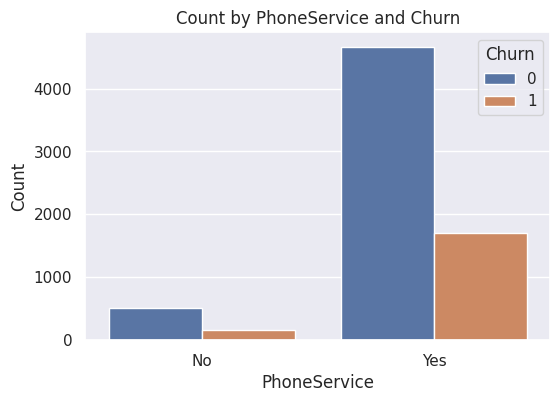

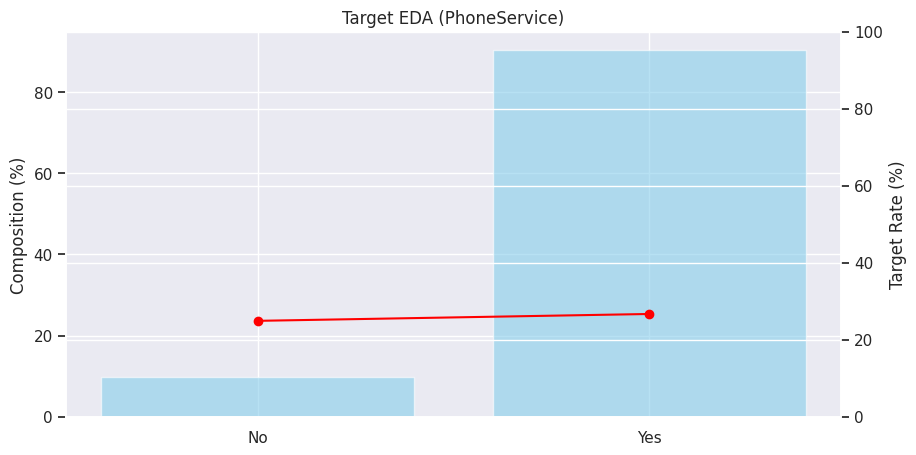

6 MultipleLines
                  cnt1  Churn
MultipleLines                
No                3390    849
No phone service   682    170
Yes               2971    850


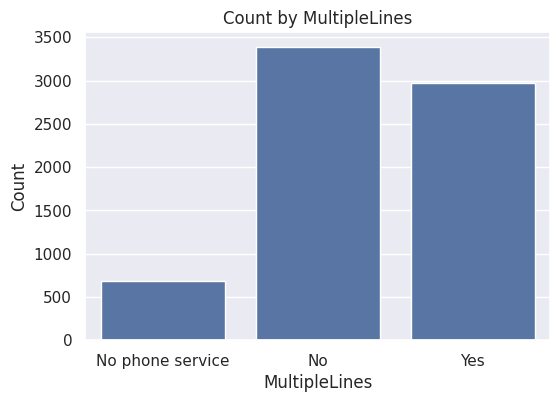

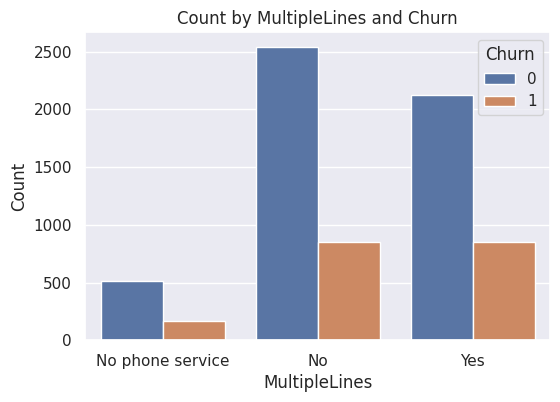

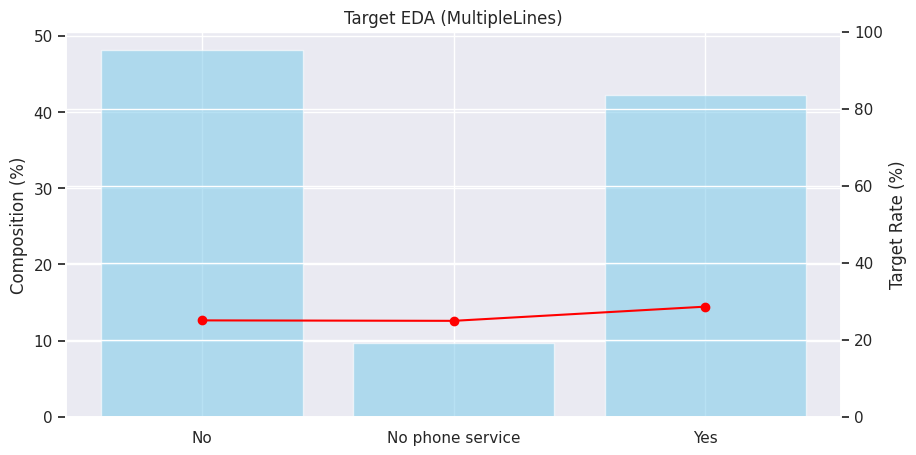

7 InternetService
                 cnt1  Churn
InternetService             
DSL              2421    459
Fiber optic      3096   1297
No               1526    113


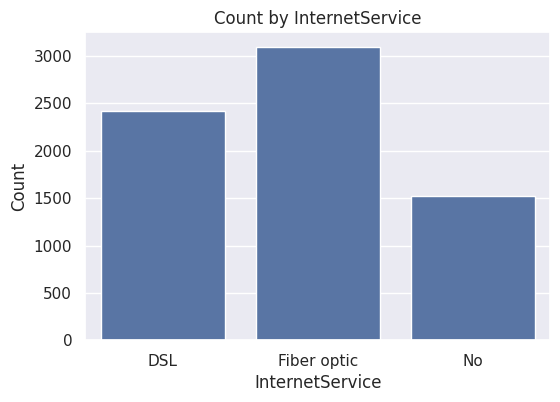

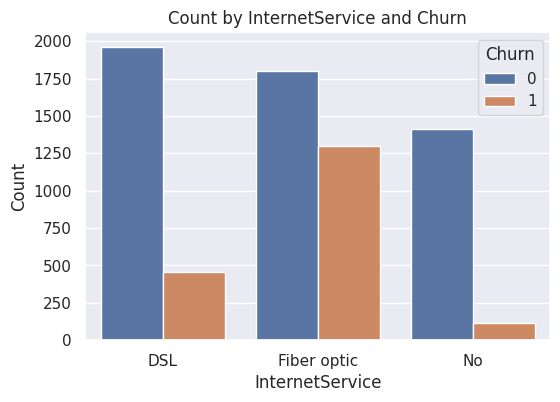

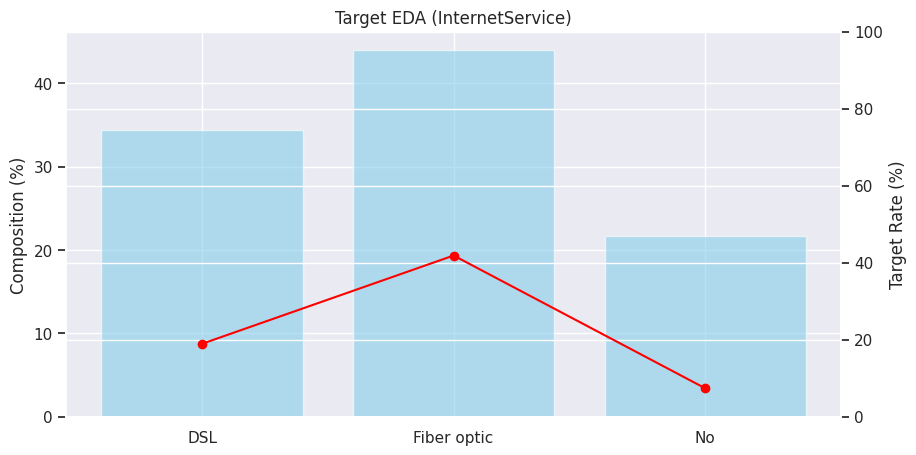

8 OnlineSecurity
                     cnt1  Churn
OnlineSecurity                  
No                   3498   1461
No internet service  1526    113
Yes                  2019    295


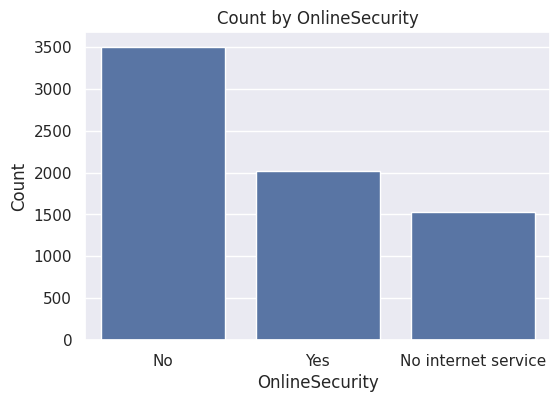

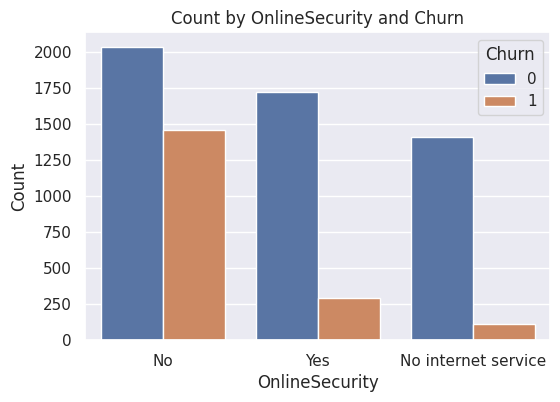

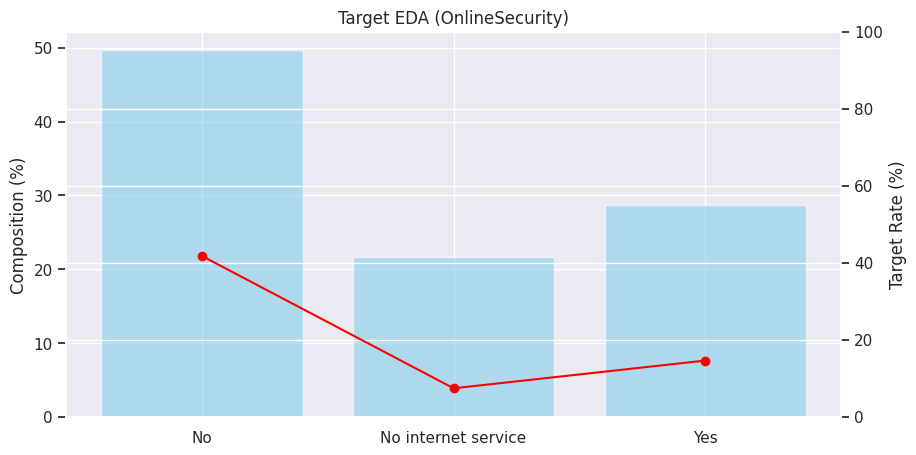

9 OnlineBackup
                     cnt1  Churn
OnlineBackup                    
No                   3088   1233
No internet service  1526    113
Yes                  2429    523


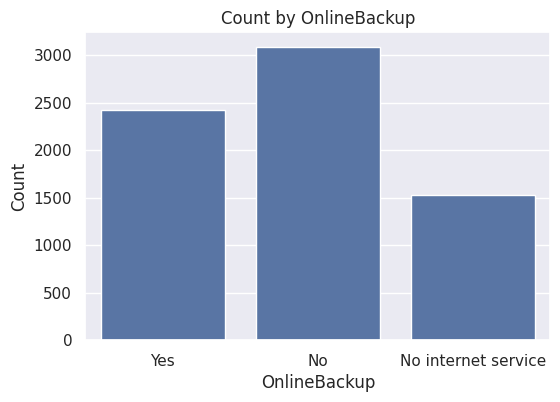

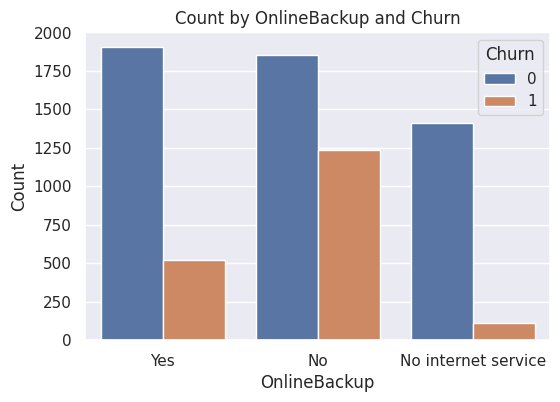

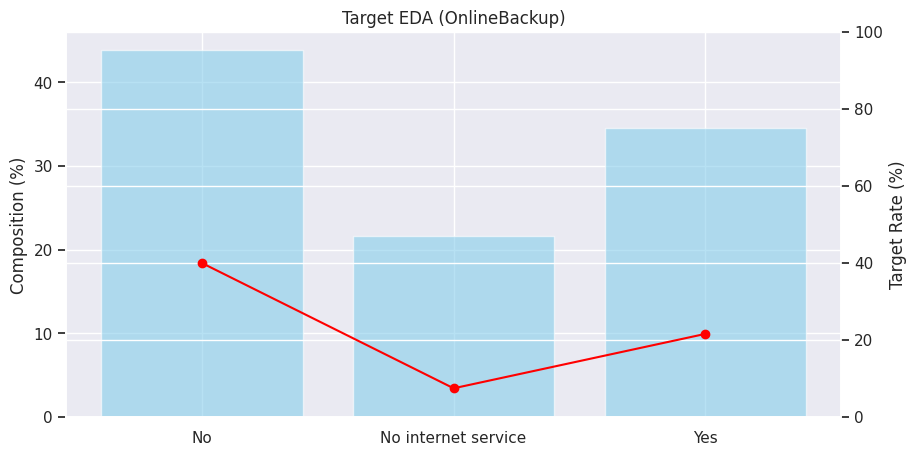

10 DeviceProtection
                     cnt1  Churn
DeviceProtection                
No                   3095   1211
No internet service  1526    113
Yes                  2422    545


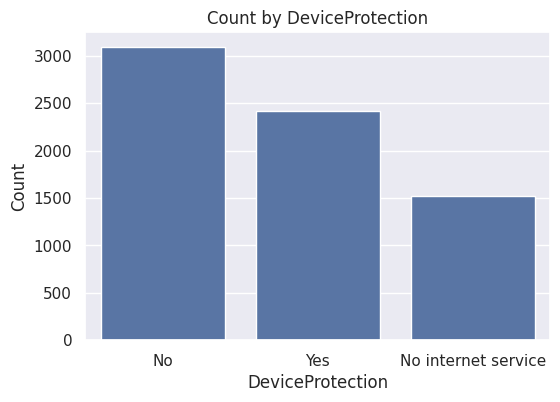

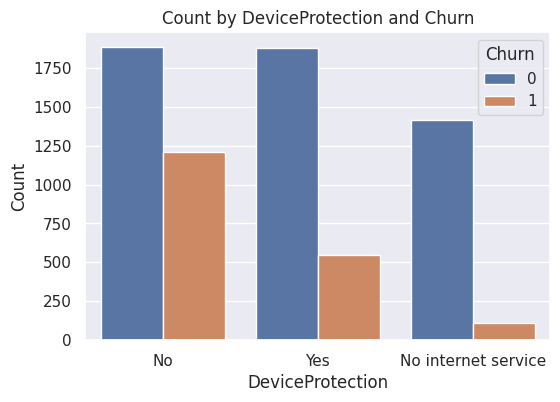

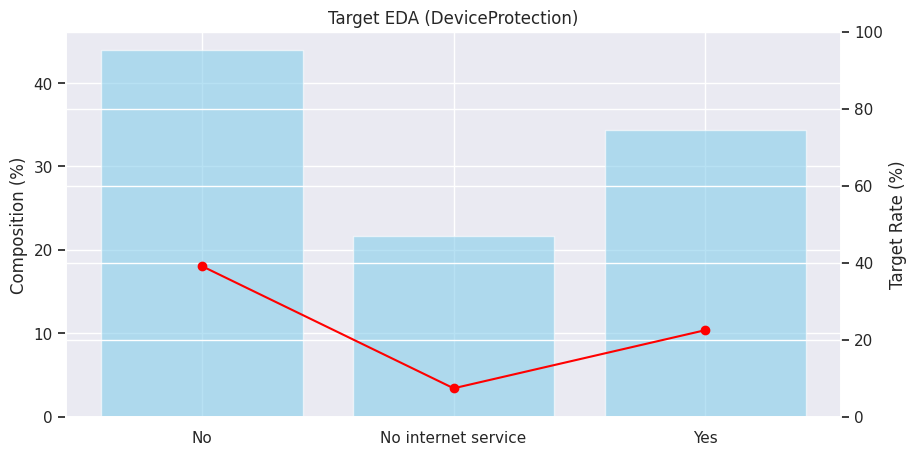

11 TechSupport
                     cnt1  Churn
TechSupport                     
No                   3473   1446
No internet service  1526    113
Yes                  2044    310


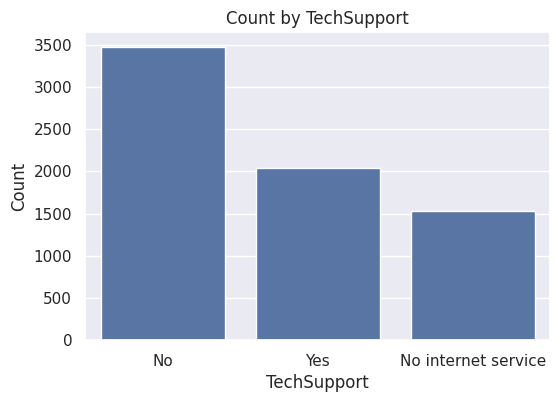

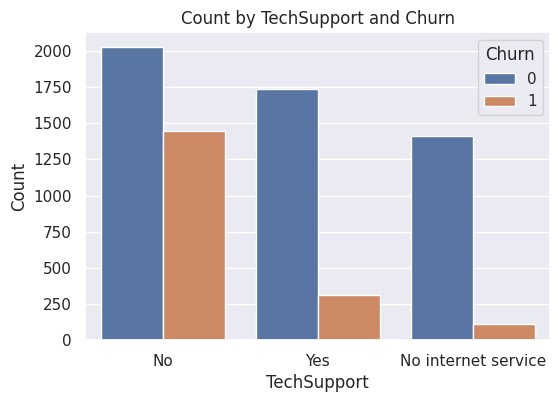

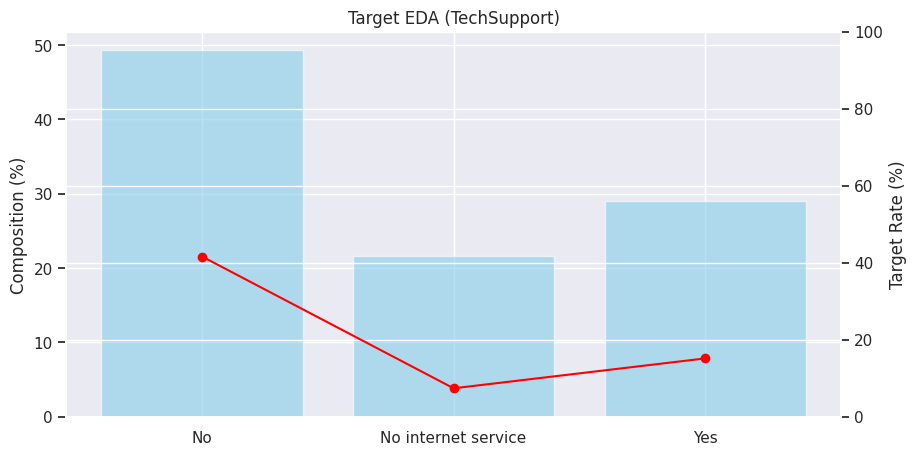

12 StreamingTV
                     cnt1  Churn
StreamingTV                     
No                   2810    942
No internet service  1526    113
Yes                  2707    814


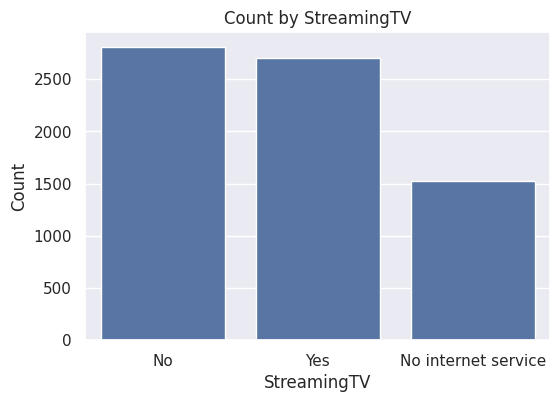

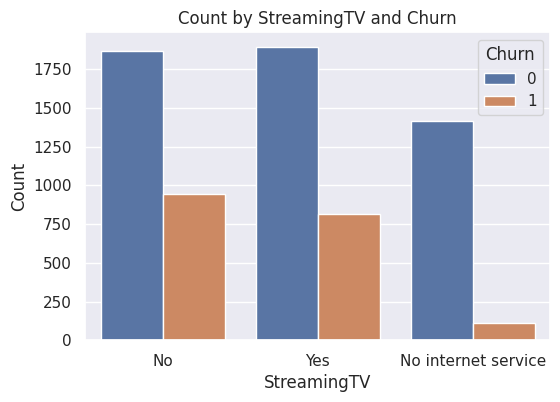

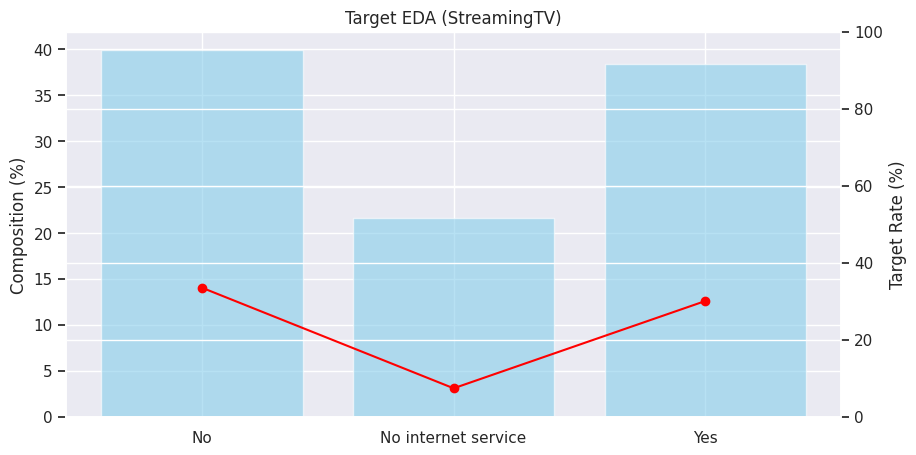

13 StreamingMovies
                     cnt1  Churn
StreamingMovies                 
No                   2785    938
No internet service  1526    113
Yes                  2732    818


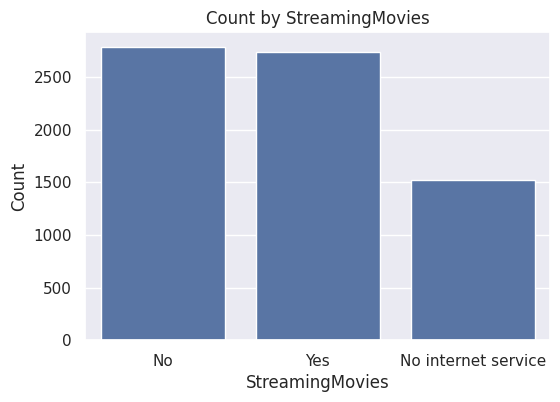

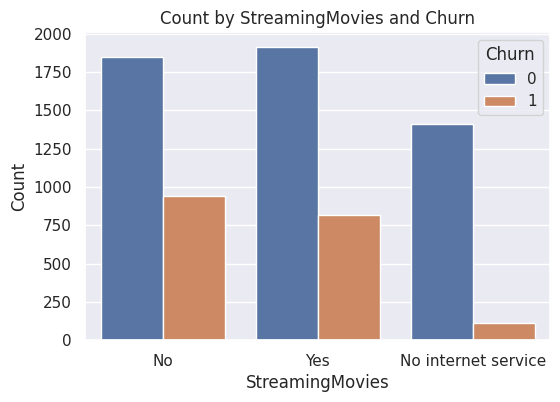

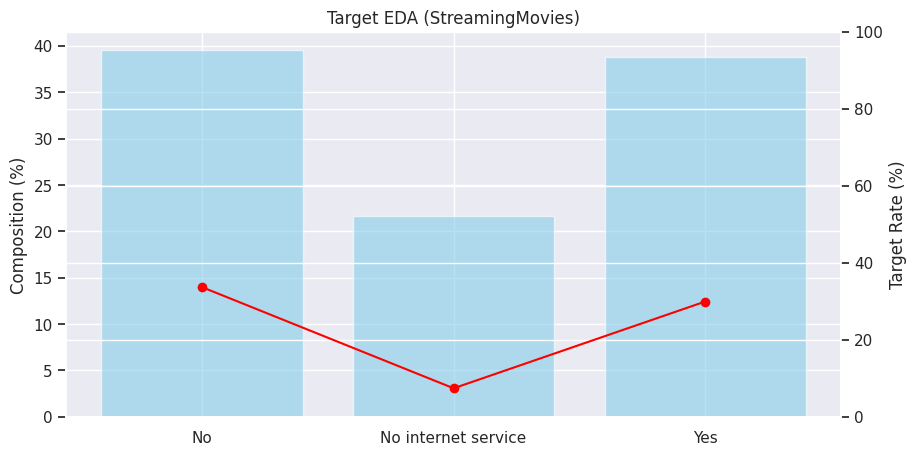

14 Contract
                cnt1  Churn
Contract                   
Month-to-month  3875   1655
One year        1473    166
Two year        1695     48


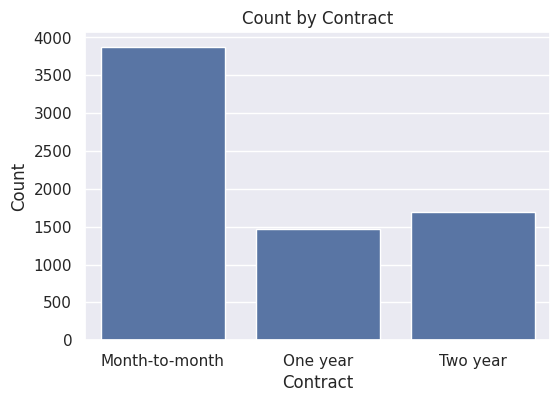

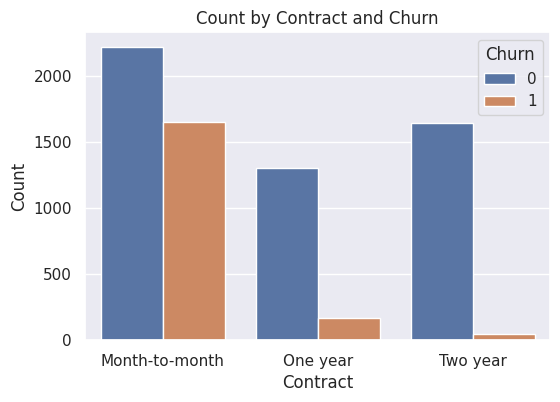

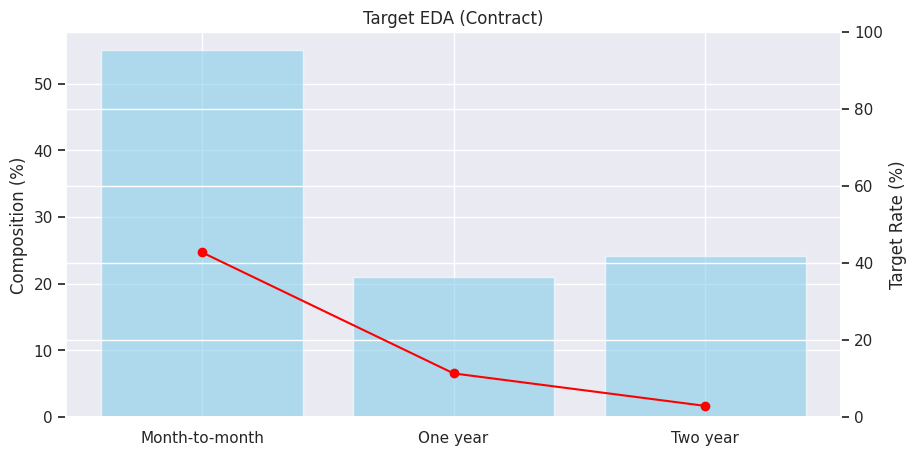

15 PaperlessBilling
                  cnt1  Churn
PaperlessBilling             
No                2872    469
Yes               4171   1400


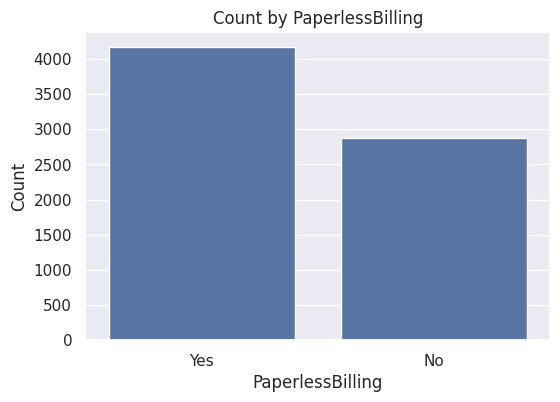

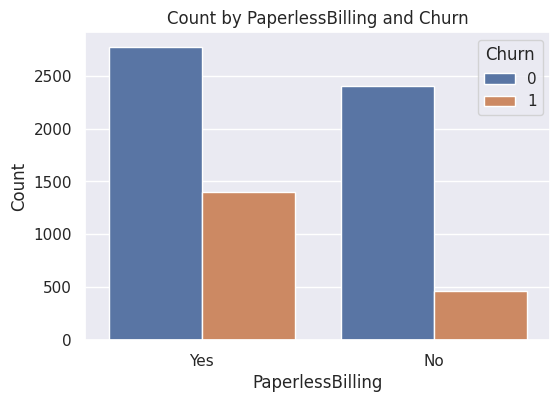

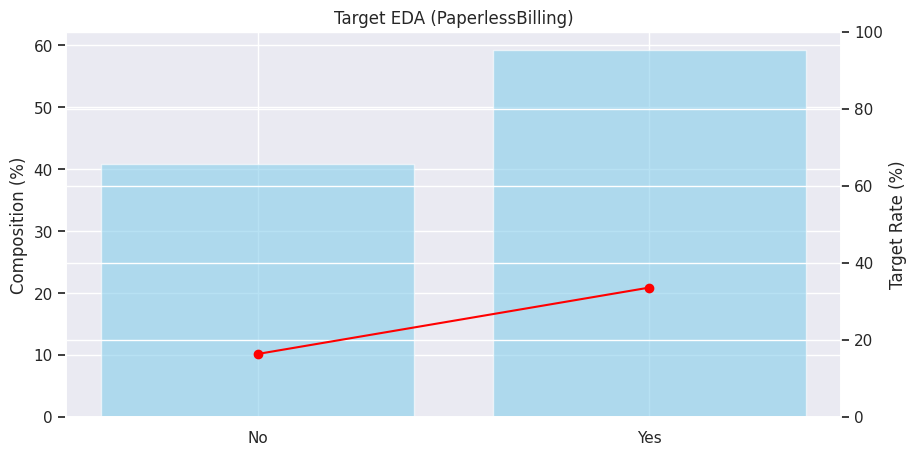

16 PaymentMethod
                           cnt1  Churn
PaymentMethod                         
Bank transfer (automatic)  1544    258
Credit card (automatic)    1522    232
Electronic check           2365   1071
Mailed check               1612    308


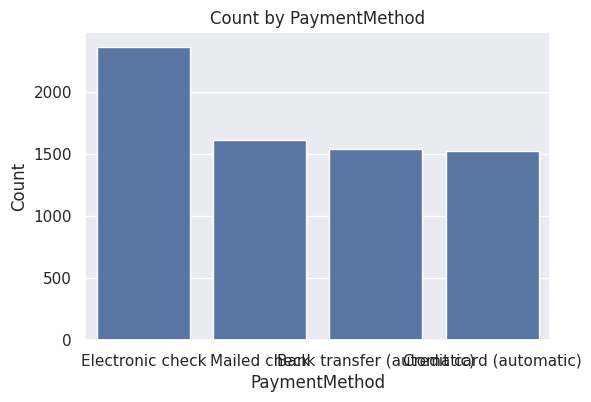

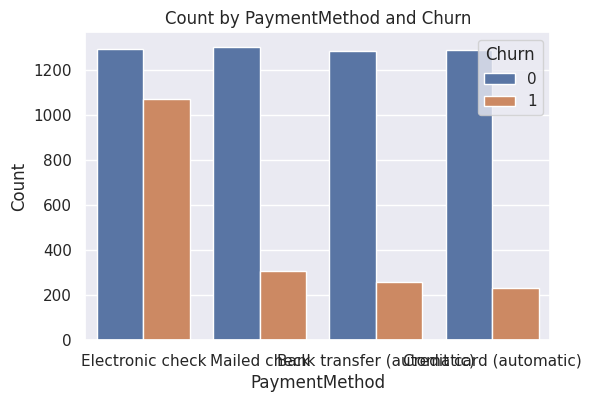

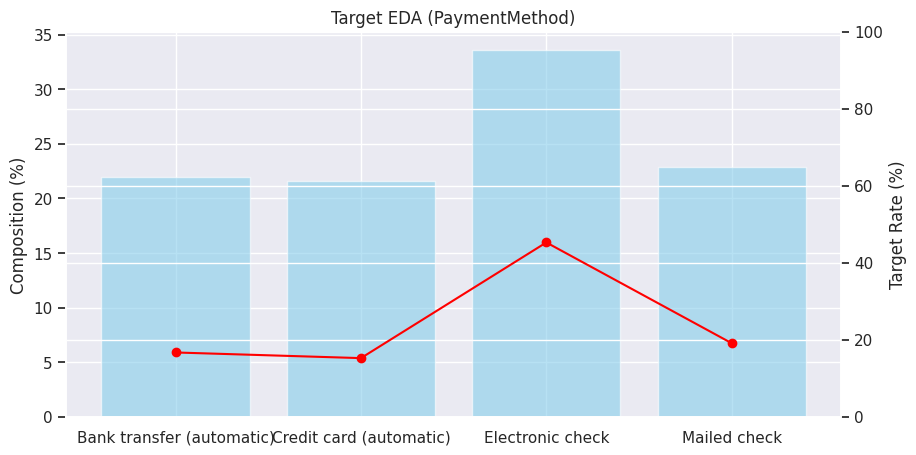

17 MonthlyCharges
                cnt1  Churn
MonthlyCharges             
18.25              1      0
18.40              1      0
18.55              1      0
18.70              2      0
18.75              1      0
...              ...    ...
118.20             1      0
118.35             1      1
118.60             2      0
118.65             1      0
118.75             1      0

[1585 rows x 2 columns]


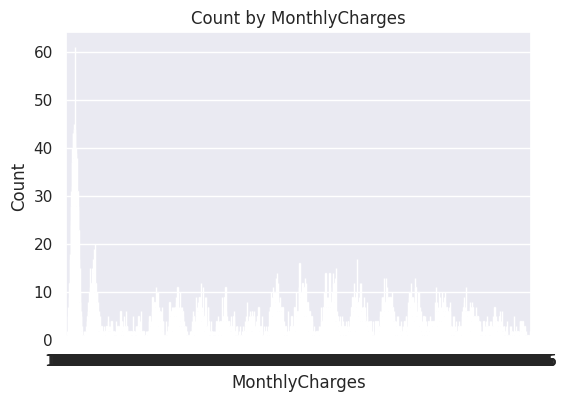

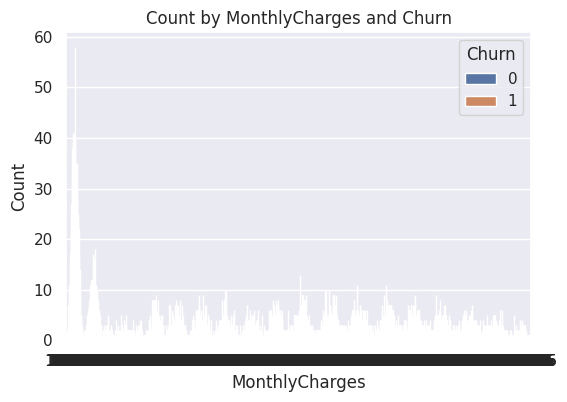

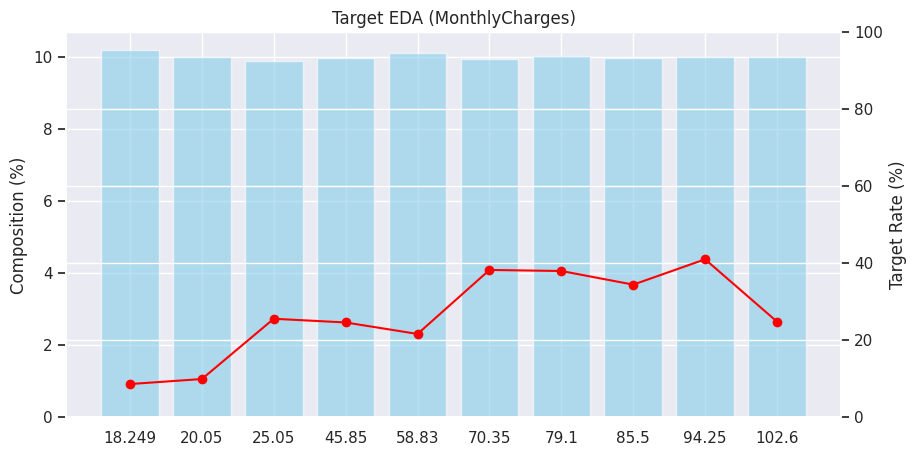

18 TotalCharges
              cnt1  Churn
TotalCharges             
18.80            1      0
18.85            2      1
18.90            1      0
19.00            1      0
19.05            1      0
...            ...    ...
8564.75          1      0
8594.40          1      0
8670.10          1      0
8672.45          1      0
8684.80          1      1

[6530 rows x 2 columns]


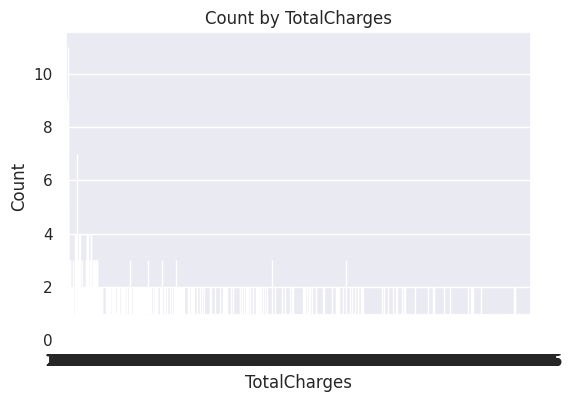

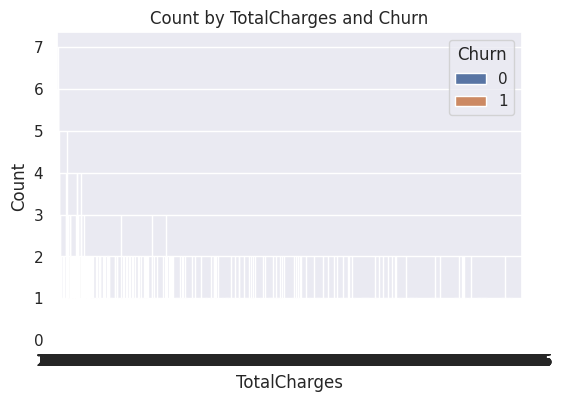

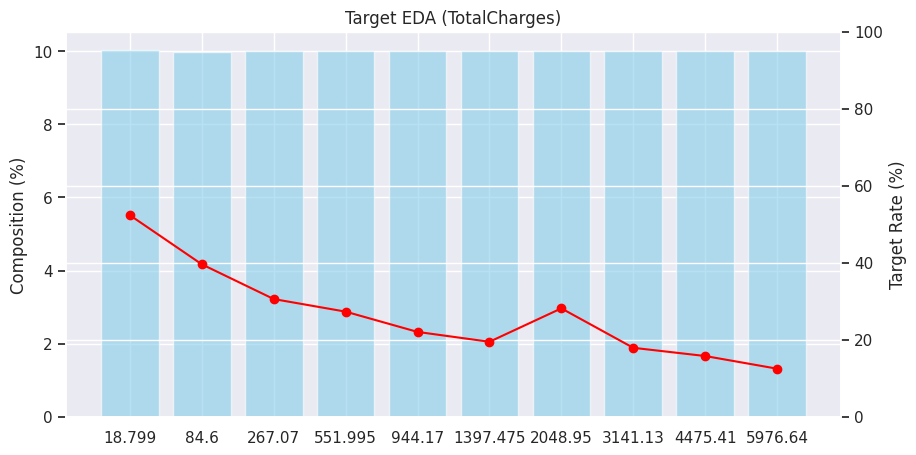

In [147]:
for index, col in enumerate(cols):
  print(index, col)
  print(df.groupby(col)[['cnt1', 'Churn']].sum())
  eda_count_categorical(df, col)
  eda_count_categorical_target(df, col, 'Churn')
  eda_target(df, col, target_col='Churn', bins=10)

#### 세그먼트

In [210]:
summary = df.groupby(['SeniorCitizen', 'PhoneService'])[['cnt1', 'Churn']].sum()

In [211]:
summary = summary.reset_index()

In [212]:
summary['ChurnRate'] = summary['Churn'] / summary['cnt1'] * 100

In [213]:
summary

,SeniorCitizen,PhoneService,cnt1,Churn,ChurnRate
0,0,No,578,126,21.799308
1,0,Yes,5323,1267,23.802367
2,1,No,104,44,42.307692
3,1,Yes,1038,432,41.618497


## 3.데이터 전처리

### 결측치 처리

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
# 결측치 데이터 확인
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
# 평균값으로 대체
df = df.fillna(df["TotalCharges"].mean())

# 결측치 처리할 수 있는 다른 방법이 있다면 코드 채워주세요

In [256]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


#### 결측치가 있는 행 삭제

In [313]:
df1 = df.copy()  # copy 해야 값복사

In [314]:
df1.shape

(7043, 22)

In [315]:
df1['temp'] = df1['TotalCharges'].tolist()

In [316]:
df1[df1['temp'].isnull() == True].shape

(11, 23)

In [317]:
# 결측치가 있는 행 삭제
df1.dropna(subset=['temp'], inplace=True)

In [318]:
df1.shape

(7032, 23)

#### 결측치가 있는 컬럼 삭제

In [322]:
df1 = df.copy()  # copy 해야 값복사

In [323]:
df1['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [324]:
df1[df1['temp'].isnull() == True].shape

(1394, 23)

In [325]:
# 결측치가 있는 컬럼 삭제
df1.drop(columns=['temp'], inplace=True)

In [327]:
df1.shape

(7043, 22)

#### 결측치 자체가 의미가 있을 때 다른 값으로 치환

In [328]:
df1 = df.copy()  # copy 해야 값복사

In [329]:
df1['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [330]:
df1[df1['temp'].isnull() == True].shape

(1345, 23)

In [331]:
# 결측치 다른 값으로 치환
df1['temp'].fillna(-999, inplace=True)

In [332]:
df1[df1['temp'].isnull() == True].shape

(0, 23)

#### 결측치를 평균값으로 대체

In [334]:
df1 = df.copy()  # copy 해야 값복사

In [335]:
df1['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [336]:
df1[df1['temp'].isnull() == True].shape

(1447, 23)

In [337]:
# 결측치 다른 값으로 치환
df1['temp'].fillna(df1['temp'].mean(), inplace=True)

In [338]:
df1[df1['temp'].isnull() == True].shape

(0, 23)

#### 결측치를 중앙값으로 대체 (이상치가 많을 경우)

In [352]:
df1 = df.copy()  # copy 해야 값복사

In [353]:
df1['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [354]:
df1[df1['temp'].isnull() == True].shape

(1362, 23)

In [355]:
# 결측치 다른 값으로 치환
df1['temp'].fillna(df1['temp'].median(), inplace=True)

In [356]:
df1[df1['temp'].isnull() == True].shape

(0, 23)

#### 결측치를 이전 행의 값으로 대체 (센서 데이터의 경우)

In [357]:
df1 = df.copy()  # copy 해야 값복사

In [358]:
df1['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [359]:
df1[df1['temp'].isnull() == True].shape

(1392, 23)

In [362]:
df1['temp'].head()

,temp
0,98.0
1,150.0
2,NaN
3,115.0
4,142.0


In [363]:
df1['temp'].tail()

,temp
7038,152.0
7039,NaN
7040,174.0
7041,NaN
7042,87.0


In [364]:
df1['temp'] = df1['temp'].fillna(method='ffill')

In [365]:
df1['temp'].head()

,temp
0,98.0
1,150.0
2,150.0
3,115.0
4,142.0


In [366]:
df1['temp'].tail()

,temp
7038,152.0
7039,152.0
7040,174.0
7041,174.0
7042,87.0


#### 결측치를 이후 행의 값으로 대체 (센서 데이터의 경우)

In [367]:
df1 = df.copy()  # copy 해야 값복사

In [368]:
df1['temp'] = np.where(np.random.rand(len(df)) < 0.2, np.nan, np.random.randint(50, 200, size=7043))

In [369]:
df1[df1['temp'].isnull() == True].shape

(1397, 23)

In [370]:
df1['temp'].head()

,temp
0,71.0
1,95.0
2,107.0
3,66.0
4,87.0


In [371]:
df1['temp'].tail()

,temp
7038,NaN
7039,140.0
7040,62.0
7041,NaN
7042,65.0


In [372]:
df1['temp'] = df1['temp'].fillna(method='bfill')

In [373]:
df1['temp'].head()

,temp
0,71.0
1,95.0
2,107.0
3,66.0
4,87.0


In [374]:
df1['temp'].tail()

,temp
7038,140.0
7039,140.0
7040,62.0
7041,65.0
7042,65.0


#### imputation 모델 이용해 결측치 처리

In [375]:
df1 = df.copy()  # copy 해야 값복사

In [384]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df1_imputed = imputer.fit_transform(df1[['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn']])

In [385]:
df1_imputed = pd.DataFrame(df1_imputed, columns=['TotalCharges', 'MonthlyCharges', 'tenure', 'Churn'])

In [386]:
df1_imputed.head()

,TotalCharges,MonthlyCharges,tenure,Churn
0,29.85,29.85,1.0,0.0
1,1889.50,56.95,34.0,0.0
2,108.15,53.85,2.0,1.0
3,1840.75,42.30,45.0,0.0
4,151.65,70.70,2.0,1.0


In [388]:
df['TotalCharges'] = list(df1['TotalCharges'])

In [389]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,cnt1
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1


### 이상치 처리

In [ ]:
## 코드 채워주세요

### 문자형 데이터 더미화

In [ ]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False


### 연속형 데이터 Scale

In [ ]:
y = df_dummies['Churn'].values
X = df_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.013889,0.115423,0.001275,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.472222,0.385075,0.215867,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.027778,0.354229,0.010310,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.625000,0.239303,0.210241,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.027778,0.521891,0.015330,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
y

NameError: name 'y' is not defined

In [ ]:
# test set 10% (우리는 답을 알지만 답을 모른다고 가정)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y,
                                                    random_state=42)

In [ ]:
# train -> train / valid set 구분
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train,
                                                      random_state=42)

## 4.Baseline Model 학습 및 성능 비교 (8개)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# 모델 리스트
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    # 'K-Nearest Neighbors': KNeighborsClassifier(),
    # 'Support Vector Classifier': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    # 'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42)
}

In [ ]:
# 모델 학습 및 평가
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, preds)
    results[model_name] = accuracy
    print(f"{model_name} accuracy is: {accuracy:.4f}")

Logistic Regression accuracy is: 0.8013
K-Nearest Neighbors accuracy is: 0.7555
Support Vector Classifier accuracy is: 0.7981
Decision Tree accuracy is: 0.7624
Random Forest accuracy is: 0.7839
Gradient Boosting accuracy is: 0.8044
XGBoost accuracy is: 0.7755
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001229 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452
LightGBM accuracy is: 0.7897


In [ ]:
# 결과 출력
print("\nModel Evaluation Summary:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")


Model Evaluation Summary:
Logistic Regression: 0.8013
K-Nearest Neighbors: 0.7555
Support Vector Classifier: 0.7981
Decision Tree: 0.7624
Random Forest: 0.7839
Gradient Boosting: 0.8044
XGBoost: 0.7755
LightGBM: 0.7897


## 5.하이퍼파라미터 튜닝

In [ ]:
# LGBM 외 다른 모델에 대해서도 하이퍼파라미터 튜닝 해보세요.
# Grid Search, Random Search, Bayesian Optimization 모두 실험해보세요.

In [ ]:
!pip install optuna

### Optuna 패키지 이용

In [ ]:
import optuna
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def objective(trial):
    # 하이퍼파라미터 설정 범위를 지정
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 9),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0)
    }

    # 모델 학습
    model = lgb.LGBMClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)
    y_pred = model.predict(X_test)

    # 모델 평가
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)


In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Objective function for Optuna
def objective(trial):
    # Define the hyperparameters to optimize
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 31, 60),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 100, 300),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 40),
        'random_state': 42
    }

    # Model
    model = LGBMClassifier(**param)
    model.fit(X_train, y_train)

    # Evaluate on validation set
    val_preds = model.predict(X_valid)
    val_accuracy = accuracy_score(y_valid, val_preds)

    return val_accuracy

# 1) optuna 이용 하이퍼파라미터 튜닝
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print("Best parameters found: ", study.best_params)
print("Best validation accuracy: ", study.best_value)

# 2) Train the best model
best_params = study.best_params
best_model = LGBMClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# 3) Valid Set 성능 확인
val_preds = best_model.predict(X_valid)
val_accuracy = accuracy_score(y_valid, val_preds)
print("Final validation accuracy with best model: ", val_accuracy)

[I 2024-12-23 08:35:39,713] A new study created in memory with name: no-name-69f91254-8eb7-4706-94a4-9d470cbf04b5


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:41,346] Trial 0 finished with value: 0.795478443743428 and parameters: {'num_leaves': 38, 'learning_rate': 0.02716745151871723, 'n_estimators': 148, 'min_data_in_leaf': 24}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:43,217] Trial 1 finished with value: 0.7770767613038907 and parameters: {'num_leaves': 45, 'learning_rate': 0.08684040539089545, 'n_estimators': 287, 'min_data_in_leaf': 20}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:44,254] Trial 2 finished with value: 0.7770767613038907 and parameters: {'num_leaves': 42, 'learning_rate': 0.062489504059567234, 'n_estimators': 208, 'min_data_in_leaf': 35}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000965 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:45,687] Trial 3 finished with value: 0.7928496319663512 and parameters: {'num_leaves': 50, 'learning_rate': 0.048918922905285954, 'n_estimators': 154, 'min_data_in_leaf': 35}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:47,925] Trial 4 finished with value: 0.7844374342797056 and parameters: {'num_leaves': 50, 'learning_rate': 0.0444883950893754, 'n_estimators': 240, 'min_data_in_leaf': 20}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:49,578] Trial 5 finished with value: 0.7833859095688749 and parameters: {'num_leaves': 54, 'learning_rate': 0.07553880940610769, 'n_estimators': 206, 'min_data_in_leaf': 30}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:51,298] Trial 6 finished with value: 0.7733964248159831 and parameters: {'num_leaves': 50, 'learning_rate': 0.07608592277577164, 'n_estimators': 295, 'min_data_in_leaf': 23}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000961 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:52,474] Trial 7 finished with value: 0.7912723449001051 and parameters: {'num_leaves': 48, 'learning_rate': 0.05074331681510972, 'n_estimators': 195, 'min_data_in_leaf': 31}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:54,033] Trial 8 finished with value: 0.7807570977917981 and parameters: {'num_leaves': 38, 'learning_rate': 0.05784106544042085, 'n_estimators': 252, 'min_data_in_leaf': 21}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000874 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:55,239] Trial 9 finished with value: 0.7818086225026288 and parameters: {'num_leaves': 31, 'learning_rate': 0.07145949776098295, 'n_estimators': 224, 'min_data_in_leaf': 37}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000752 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:55,984] Trial 10 finished with value: 0.7912723449001051 and parameters: {'num_leaves': 34, 'learning_rate': 0.015152955073842908, 'n_estimators': 103, 'min_data_in_leaf': 26}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:57,640] Trial 11 finished with value: 0.795478443743428 and parameters: {'num_leaves': 57, 'learning_rate': 0.028276295085449647, 'n_estimators': 142, 'min_data_in_leaf': 39}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:35:59,326] Trial 12 finished with value: 0.7923238696109358 and parameters: {'num_leaves': 60, 'learning_rate': 0.02461186584372433, 'n_estimators': 146, 'min_data_in_leaf': 28}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:01,463] Trial 13 finished with value: 0.7891692954784437 and parameters: {'num_leaves': 59, 'learning_rate': 0.03243122460549287, 'n_estimators': 157, 'min_data_in_leaf': 39}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=39, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=39
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:02,705] Trial 14 finished with value: 0.786540483701367 and parameters: {'num_leaves': 39, 'learning_rate': 0.010142326017625623, 'n_estimators': 112, 'min_data_in_leaf': 26}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000922 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:03,903] Trial 15 finished with value: 0.7902208201892744 and parameters: {'num_leaves': 55, 'learning_rate': 0.03531667426875146, 'n_estimators': 176, 'min_data_in_leaf': 40}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000919 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:05,179] Trial 16 finished with value: 0.7944269190325972 and parameters: {'num_leaves': 38, 'learning_rate': 0.023119908519354367, 'n_estimators': 129, 'min_data_in_leaf': 32}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:06,439] Trial 17 finished with value: 0.7907465825446898 and parameters: {'num_leaves': 44, 'learning_rate': 0.03856714903097575, 'n_estimators': 174, 'min_data_in_leaf': 24}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:07,665] Trial 18 finished with value: 0.7939011566771819 and parameters: {'num_leaves': 34, 'learning_rate': 0.024087222138025062, 'n_estimators': 130, 'min_data_in_leaf': 33}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:08,519] Trial 19 finished with value: 0.7781282860147214 and parameters: {'num_leaves': 56, 'learning_rate': 0.09716828196251845, 'n_estimators': 181, 'min_data_in_leaf': 28}. Best is trial 0 with value: 0.795478443743428.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:09,248] Trial 20 finished with value: 0.7975814931650894 and parameters: {'num_leaves': 40, 'learning_rate': 0.03033344998624441, 'n_estimators': 130, 'min_data_in_leaf': 23}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=23, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=23
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:10,067] Trial 21 finished with value: 0.7949526813880127 and parameters: {'num_leaves': 41, 'learning_rate': 0.02879544807290091, 'n_estimators': 134, 'min_data_in_leaf': 24}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:11,047] Trial 22 finished with value: 0.7917981072555205 and parameters: {'num_leaves': 35, 'learning_rate': 0.01730052007564924, 'n_estimators': 115, 'min_data_in_leaf': 22}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:11,994] Trial 23 finished with value: 0.7939011566771819 and parameters: {'num_leaves': 41, 'learning_rate': 0.041544830858137184, 'n_estimators': 162, 'min_data_in_leaf': 26}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=26, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=26
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:12,960] Trial 24 finished with value: 0.795478443743428 and parameters: {'num_leaves': 47, 'learning_rate': 0.030518486321136355, 'n_estimators': 140, 'min_data_in_leaf': 28}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=28, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=28
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:14,045] Trial 25 finished with value: 0.7944269190325972 and parameters: {'num_leaves': 36, 'learning_rate': 0.01880288019191182, 'n_estimators': 112, 'min_data_in_leaf': 24}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:15,930] Trial 26 finished with value: 0.7949526813880127 and parameters: {'num_leaves': 31, 'learning_rate': 0.03676418822649448, 'n_estimators': 123, 'min_data_in_leaf': 34}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000892 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:16,931] Trial 27 finished with value: 0.7944269190325972 and parameters: {'num_leaves': 43, 'learning_rate': 0.04747031729298114, 'n_estimators': 101, 'min_data_in_leaf': 37}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000739 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:17,901] Trial 28 finished with value: 0.7849631966351209 and parameters: {'num_leaves': 53, 'learning_rate': 0.05712823518834454, 'n_estimators': 168, 'min_data_in_leaf': 22}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:18,796] Trial 29 finished with value: 0.7912723449001051 and parameters: {'num_leaves': 45, 'learning_rate': 0.010898490844644029, 'n_estimators': 190, 'min_data_in_leaf': 20}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:19,594] Trial 30 finished with value: 0.7944269190325972 and parameters: {'num_leaves': 39, 'learning_rate': 0.02840012661765156, 'n_estimators': 149, 'min_data_in_leaf': 27}. Best is trial 20 with value: 0.7975814931650894.


[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:21,964] Trial 31 finished with value: 0.7986330178759201 and parameters: {'num_leaves': 46, 'learning_rate': 0.030535691295017174, 'n_estimators': 140, 'min_data_in_leaf': 29}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000720 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:23,046] Trial 32 finished with value: 0.7902208201892744 and parameters: {'num_leaves': 57, 'learning_rate': 0.020412443707333416, 'n_estimators': 140, 'min_data_in_leaf': 30}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:24,478] Trial 33 finished with value: 0.7944269190325972 and parameters: {'num_leaves': 52, 'learning_rate': 0.0399009265455227, 'n_estimators': 156, 'min_data_in_leaf': 25}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000906 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:25,641] Trial 34 finished with value: 0.7939011566771819 and parameters: {'num_leaves': 47, 'learning_rate': 0.033034558580418816, 'n_estimators': 121, 'min_data_in_leaf': 37}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=37, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=37
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000962 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:27,989] Trial 35 finished with value: 0.7818086225026288 and parameters: {'num_leaves': 42, 'learning_rate': 0.06483538860082028, 'n_estimators': 263, 'min_data_in_leaf': 22}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=22, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=22
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:29,857] Trial 36 finished with value: 0.7960042060988434 and parameters: {'num_leaves': 37, 'learning_rate': 0.04354928782895689, 'n_estimators': 219, 'min_data_in_leaf': 29}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:31,246] Trial 37 finished with value: 0.7917981072555205 and parameters: {'num_leaves': 37, 'learning_rate': 0.04376750041760796, 'n_estimators': 230, 'min_data_in_leaf': 29}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:32,110] Trial 38 finished with value: 0.7939011566771819 and parameters: {'num_leaves': 40, 'learning_rate': 0.045587463485065115, 'n_estimators': 204, 'min_data_in_leaf': 31}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:33,169] Trial 39 finished with value: 0.7912723449001051 and parameters: {'num_leaves': 33, 'learning_rate': 0.051843310722411426, 'n_estimators': 219, 'min_data_in_leaf': 30}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:34,748] Trial 40 finished with value: 0.7854889589905363 and parameters: {'num_leaves': 49, 'learning_rate': 0.05288568104903302, 'n_estimators': 242, 'min_data_in_leaf': 25}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:36,171] Trial 41 finished with value: 0.795478443743428 and parameters: {'num_leaves': 36, 'learning_rate': 0.02605197723479978, 'n_estimators': 268, 'min_data_in_leaf': 35}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:37,513] Trial 42 finished with value: 0.7970557308096741 and parameters: {'num_leaves': 43, 'learning_rate': 0.03417227576177659, 'n_estimators': 189, 'min_data_in_leaf': 32}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:38,524] Trial 43 finished with value: 0.7975814931650894 and parameters: {'num_leaves': 45, 'learning_rate': 0.03531642147316949, 'n_estimators': 192, 'min_data_in_leaf': 32}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000742 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:39,514] Trial 44 finished with value: 0.7960042060988434 and parameters: {'num_leaves': 46, 'learning_rate': 0.03495965790325587, 'n_estimators': 212, 'min_data_in_leaf': 32}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=32, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=32
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:40,357] Trial 45 finished with value: 0.7928496319663512 and parameters: {'num_leaves': 44, 'learning_rate': 0.04098779499840698, 'n_estimators': 190, 'min_data_in_leaf': 34}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=34, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=34
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000993 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:41,551] Trial 46 finished with value: 0.7870662460567823 and parameters: {'num_leaves': 43, 'learning_rate': 0.061149672575186366, 'n_estimators': 195, 'min_data_in_leaf': 31}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=31, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=31
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:42,923] Trial 47 finished with value: 0.786540483701367 and parameters: {'num_leaves': 51, 'learning_rate': 0.04953406735149238, 'n_estimators': 212, 'min_data_in_leaf': 29}. Best is trial 31 with value: 0.7986330178759201.


[LightGBM] [Warning] min_data_in_leaf is set=29, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=29
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000977 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:44,196] Trial 48 finished with value: 0.8007360672975815 and parameters: {'num_leaves': 41, 'learning_rate': 0.03194131081742237, 'n_estimators': 226, 'min_data_in_leaf': 33}. Best is trial 48 with value: 0.8007360672975815.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train set: 4436, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265329 -> initscore=-1.018452
[LightGBM] [Info] Start training from score -1.018452


[I 2024-12-23 08:36:45,115] Trial 49 finished with value: 0.7933753943217665 and parameters: {'num_leaves': 46, 'learning_rate': 0.014538961755092783, 'n_estimators': 230, 'min_data_in_leaf': 33}. Best is trial 48 with value: 0.8007360672975815.


[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
Best parameters found:  {'num_leaves': 41, 'learning_rate': 0.03194131081742237, 'n_estimators': 226, 'min_data_in_leaf': 33}
Best validation accuracy:  0.8007360672975815
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Info] Number of positive: 1177, number of negative: 3259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000749 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM] [Info] Number of data points in the train s

## 6.결과파일생성

In [ ]:
test_preds = best_model.predict(X_test)

[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33


In [ ]:
submission = pd.DataFrame(test_preds, index = X_test.index, columns=['y'])
submission.head()

,y
402,0
1292,0
1175,0
4600,0
3464,1


In [ ]:
submission.to_csv("submission.csv")